In [1]:
ptm = Sys.time()

library(CellChat)
library(patchwork)
options(stringsAsFactors = FALSE)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



In [2]:
library(data.table)
library(Matrix)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [3]:
options(future.globals.maxSize = 2000 * 1024^2)

In [14]:
# case = 'HT206B1'
case = 'HT413C1-Th1k4A1'
directory = paste('/data/estorrs/mushroom/data/projects/submission_v1/', case, '/cellchat_cosmx/', sep = '')
directory

[1] "/data/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/cellchat_cosmx/"

In [15]:
# nbhds = read.table(
#     file = paste(directory, 'nbhds.txt', sep = ''),
#     sep = '\t',
#     header = TRUE,
#     row.names = 'cell_id'
# )
# head(nbhds)

In [16]:
meta = read.table(
    file = paste(directory, 'meta.txt', sep = ''),
    sep = '\t',
    header = TRUE,
    row.names = 'cell_id'
)
colnames(meta) = c('labels', 'samples')
head(meta)

labels        samples           
HT413C1-Th1k4A1-U7_c_1_44_2 Epithelial    HT413C1-Th1k4A1-U7
HT413C1-Th1k4A1-U7_c_1_44_3 Epithelial    HT413C1-Th1k4A1-U7
HT413C1-Th1k4A1-U7_c_1_44_4 Epithelial    HT413C1-Th1k4A1-U7
HT413C1-Th1k4A1-U7_c_1_44_6 Cholangiocyte HT413C1-Th1k4A1-U7
HT413C1-Th1k4A1-U7_c_1_44_7 Epithelial    HT413C1-Th1k4A1-U7
HT413C1-Th1k4A1-U7_c_1_44_9 Epithelial    HT413C1-Th1k4A1-U7

In [17]:
unique(meta$samples)

[1] "HT413C1-Th1k4A1-U7"  "HT413C1-Th1k4A1-U34"

In [18]:
data_input = read.table(
    file = paste(directory, 'expression.txt', sep = ''),
    sep = '\t',
    header = TRUE,
    row.names = 'cell_id'
)
head(data_input)

AATK ABL1 ABL2 ACACB ACE ACKR1 ACKR3 ACKR4 ACP5
HT413C1-Th1k4A1-U7_c_1_44_2 0    0    0    0     0   0     0     0     0   
HT413C1-Th1k4A1-U7_c_1_44_3 0    0    0    0     0   0     0     0     0   
HT413C1-Th1k4A1-U7_c_1_44_4 0    0    0    0     0   0     0     0     0   
HT413C1-Th1k4A1-U7_c_1_44_6 0    0    0    0     0   0     0     0     0   
HT413C1-Th1k4A1-U7_c_1_44_7 0    0    0    0     0   0     0     0     0   
HT413C1-Th1k4A1-U7_c_1_44_9 0    0    0    0     0   0     0     0     0   
                            ACTA2 ⋯ WNT7A WNT7B WNT9A XBP1 XCL1.2 XKR4
HT413C1-Th1k4A1-U7_c_1_44_2 0     ⋯ 0     0     0     0    0      0   
HT413C1-Th1k4A1-U7_c_1_44_3 0     ⋯ 0     0     0     0    0      0   
HT413C1-Th1k4A1-U7_c_1_44_4 0     ⋯ 0     0     0     0    0      0   
HT413C1-Th1k4A1-U7_c_1_44_6 0     ⋯ 0     0     0     0    0      0   
HT413C1-Th1k4A1-U7_c_1_44_7 0     ⋯ 0     0     0     0    0      0   
HT413C1-Th1k4A1-U7_c_1_44_9 0     ⋯ 0     0     0     0    0      0   
                            YBX3      YES1 ZBTB16 ZFP36    
HT413C1-Th1k4A1-U7_c_1_44_2 0.0000000 0    0      0.0000000
HT413C1-Th1k4A1-U7_c_1_44_3 0.0000000 0    0      0.0000000
HT413C1-Th1k4A1-U7_c_1_44_4 0.4678399 0    0      0.7853085
HT413C1-Th1k4A1-U7_c_1_44_6 0.0000000 0    0      0.0000000
HT413C1-Th1k4A1-U7_c_1_44_7 0.0000000 0    0      0.0000000
HT413C1-Th1k4A1-U7_c_1_44_9 0.0000000 0    0      0.0000000

In [19]:
ids = rownames(data_input)
genes = colnames(data_input)
data_input = transpose(data_input)
data_input = data.matrix(data_input)
rownames(data_input) = genes
colnames(data_input) = ids
head(data_input)

HT413C1-Th1k4A1-U7_c_1_44_2 HT413C1-Th1k4A1-U7_c_1_44_3
AATK  0                           0                          
ABL1  0                           0                          
ABL2  0                           0                          
ACACB 0                           0                          
ACE   0                           0                          
ACKR1 0                           0                          
      HT413C1-Th1k4A1-U7_c_1_44_4 HT413C1-Th1k4A1-U7_c_1_44_6
AATK  0                           0                          
ABL1  0                           0                          
ABL2  0                           0                          
ACACB 0                           0                          
ACE   0                           0                          
ACKR1 0                           0                          
      HT413C1-Th1k4A1-U7_c_1_44_7 HT413C1-Th1k4A1-U7_c_1_44_9
AATK  0                           0                          
ABL1  0                           0                          
ABL2  0                           0                          
ACACB 0                           0                          
ACE   0                           0                          
ACKR1 0                           0                          
      HT413C1-Th1k4A1-U7_c_1_44_10 HT413C1-Th1k4A1-U7_c_1_44_11
AATK  0.0000000                    0                           
ABL1  0.0000000                    0                           
ABL2  0.9355553                    0                           
ACACB 0.0000000                    0                           
ACE   0.0000000                    0                           
ACKR1 0.4162135                    0                           
      HT413C1-Th1k4A1-U7_c_1_44_12 HT413C1-Th1k4A1-U7_c_1_44_13 ⋯
AATK  0                            0                            ⋯
ABL1  0                            0                            ⋯
ABL2  0                            0                            ⋯
ACACB 0                            0                            ⋯
ACE   0                            0                            ⋯
ACKR1 0                            0                            ⋯
      HT413C1-Th1k4A1-U34_c_1_43_240 HT413C1-Th1k4A1-U34_c_1_43_241
AATK  0                              0.000000                      
ABL1  0                              1.471728                      
ABL2  0                              0.750906                      
ACACB 0                              0.000000                      
ACE   0                              0.000000                      
ACKR1 0                              0.000000                      
      HT413C1-Th1k4A1-U34_c_1_43_242 HT413C1-Th1k4A1-U34_c_1_43_244
AATK  0.71562                        0.0000000                     
ABL1  0.00000                        0.0000000                     
ABL2  0.00000                        0.0000000                     
ACACB 0.00000                        0.6743672                     
ACE   0.71562                        0.0000000                     
ACKR1 0.00000                        0.0000000                     
      HT413C1-Th1k4A1-U34_c_1_43_246 HT413C1-Th1k4A1-U34_c_1_43_247
AATK  0.8519253                      0                             
ABL1  0.0000000                      0                             
ABL2  0.0000000                      0                             
ACACB 0.0000000                      0                             
ACE   0.0000000                      0                             
ACKR1 0.0000000                      0                             
      HT413C1-Th1k4A1-U34_c_1_43_250 HT413C1-Th1k4A1-U34_c_1_43_256
AATK  0                              0.0000000                     
ABL1  0                              0.0000000                     
ABL2  0                              0.8163356                     
ACACB 0                              0.0000000                     
ACE   0                   

In [20]:
coordinates = read.table(
    file = paste(directory, 'coordinates.txt', sep = ''),
    sep = '\t',
    header = TRUE,
    row.names = 'cell_id'
)
colnames(coordinates) = c('imagecol', 'imagerow')
head(coordinates)

imagecol imagerow
HT413C1-Th1k4A1-U7_c_1_44_2 2618     1394    
HT413C1-Th1k4A1-U7_c_1_44_3 2597     1399    
HT413C1-Th1k4A1-U7_c_1_44_4 2608     1401    
HT413C1-Th1k4A1-U7_c_1_44_6 2350     1426    
HT413C1-Th1k4A1-U7_c_1_44_7 2291     1432    
HT413C1-Th1k4A1-U7_c_1_44_9 2358     1429

In [21]:
spatial_factors = data.frame(ratio = 1., tol = 10.)

In [22]:
run_cellchat <- function(meta, data_input, coordinates, spatial_factors, prefix) {
    cellchat <- createCellChat(object = data_input, meta = meta, group.by = "labels",
                               datatype = "spatial", coordinates = coordinates, spatial.factors = spatial_factors)
    
    CellChatDB <- CellChatDB.human
    CellChatDB.use <- subsetDB(CellChatDB)
    cellchat@DB <- CellChatDB.use
    cellchat <- subsetData(cellchat)

    future::plan("multisession", workers = 4) 
    cellchat <- identifyOverExpressedGenes(cellchat, do.fast = FALSE)
    cellchat <- identifyOverExpressedInteractions(cellchat, variable.both = F)

    cellchat <- computeCommunProb(cellchat, type = "truncatedMean", trim = 0.1,
                                  distance.use = TRUE, interaction.range = 250, scale.distance = 6.8,
                                  contact.dependent = TRUE, contact.range = 10)

    cellchat <- filterCommunication(cellchat, min.cells = 10)
    cellchat <- computeCommunProbPathway(cellchat)
    cellchat <- aggregateNet(cellchat)

    df.net <- subsetCommunication(cellchat)

    cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")

    saveRDS(cellchat, file = paste(prefix, ".rds", sep = ""))
    write.table(df.net, file = paste(prefix, ".txt", sep = ""), sep = "\t", quote = FALSE)

}

In [ ]:
prefix = paste(directory, 'results', sep = "")
run_cellchat(meta, data_input, coordinates, spatial_factors, prefix)

[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in createCellChat(object = data_input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor!”


In [ ]:
# col = "nbhd_integrated_level2"
# for (nbhd in unique(nbhds[,col])) {
#     prefix = paste("/data/estorrs/mushroom/data/projects/submission_v1/analysis/cellchat/", case, "/", col, "-", gsub(" ", "_", nbhd), sep = "")
    
#     barcodes = rownames(subset(nbhds, nbhds[,col]==nbhd))
#     meta_nbhd = meta[barcodes,]
#     coordinates_nbhd = coordinates[barcodes,] 
#     data_input_nbhd = data_input[,barcodes]
    
#     print(c(nbhd, length(barcodes)))

#     tryCatch(
#         {
#             run_cellchat(meta_nbhd, data_input_nbhd, coordinates_nbhd, spatial_factors, prefix)
#         },
#         error = function(cond) {
#             message(paste(nbhd, 'failed'))
#             message(conditionMessage(cond))
#             NA
#         }
#     )
# }

In [ ]:
# cellchat = readRDS("/data/estorrs/mushroom/data/projects/submission_v1/analysis/cellchat/HT206B1/nbhd_integrated_level2-nbhd_12.rds")
# cellchat

In [14]:
cellchat = readRDS("/data/estorrs/mushroom/data/projects/submission_v1/HT206B1/cellchat/results.rds")
cellchat

An object of class CellChat created from a single dataset 
 377 genes.
 649867 cells. 
CellChat analysis of spatial data! The input spatial locations are 
                      x_cent y_cent
HT206B1-U1_aaaclnhj-1   1441    844
HT206B1-U1_aaagfbeg-1   1327    851
HT206B1-U1_aaamcmll-1   1655    193
HT206B1-U1_aaamgegl-1   1256    861
HT206B1-U1_aaaobddd-1   1670    300
HT206B1-U1_aabhoeff-1   1648    215

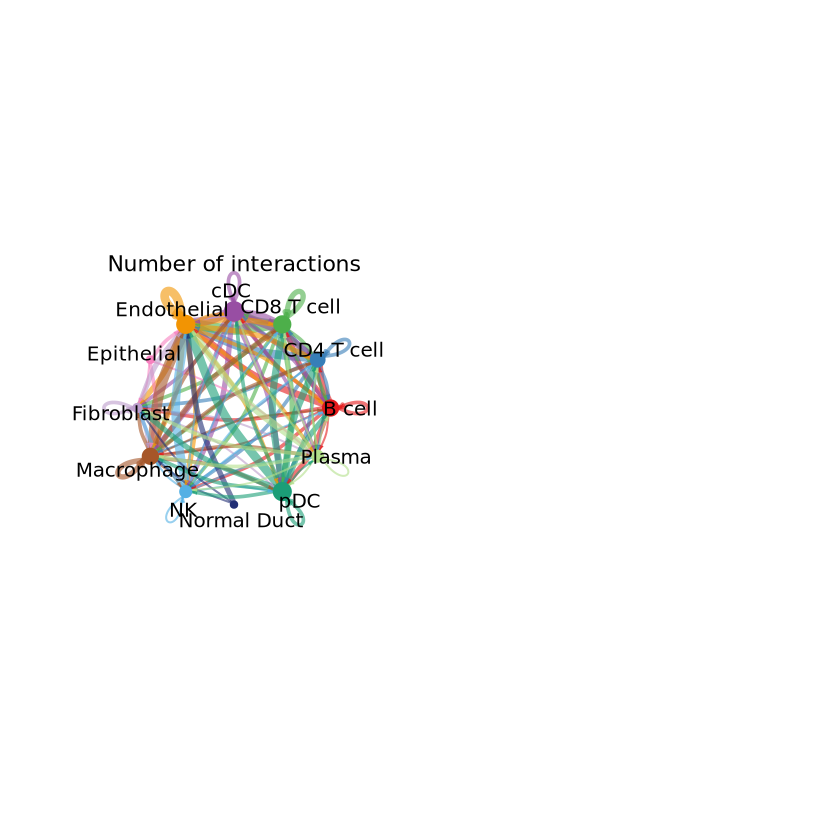

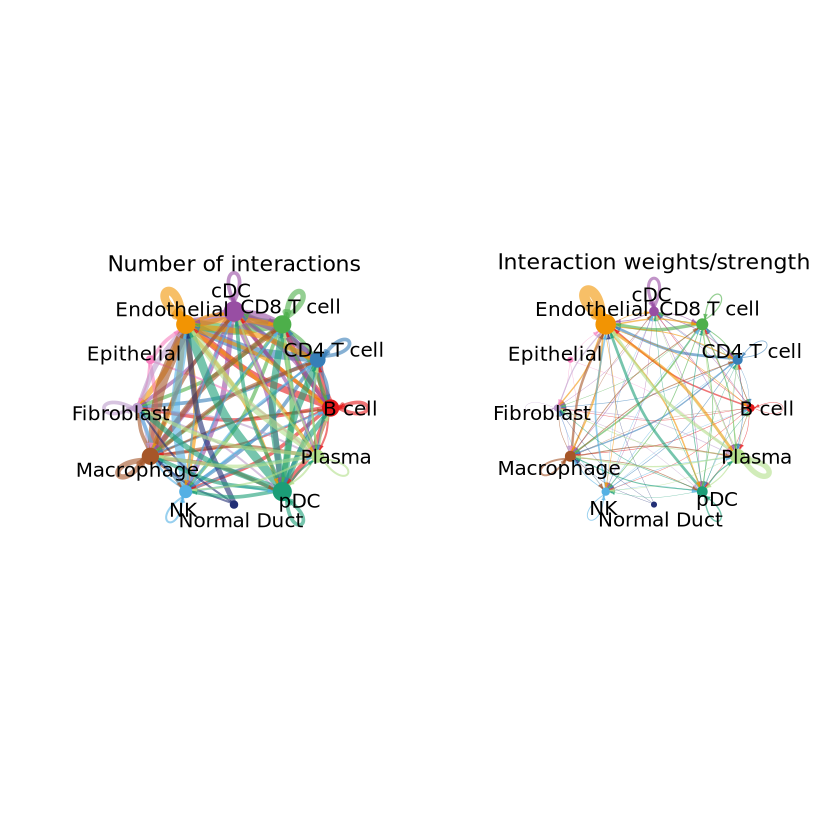

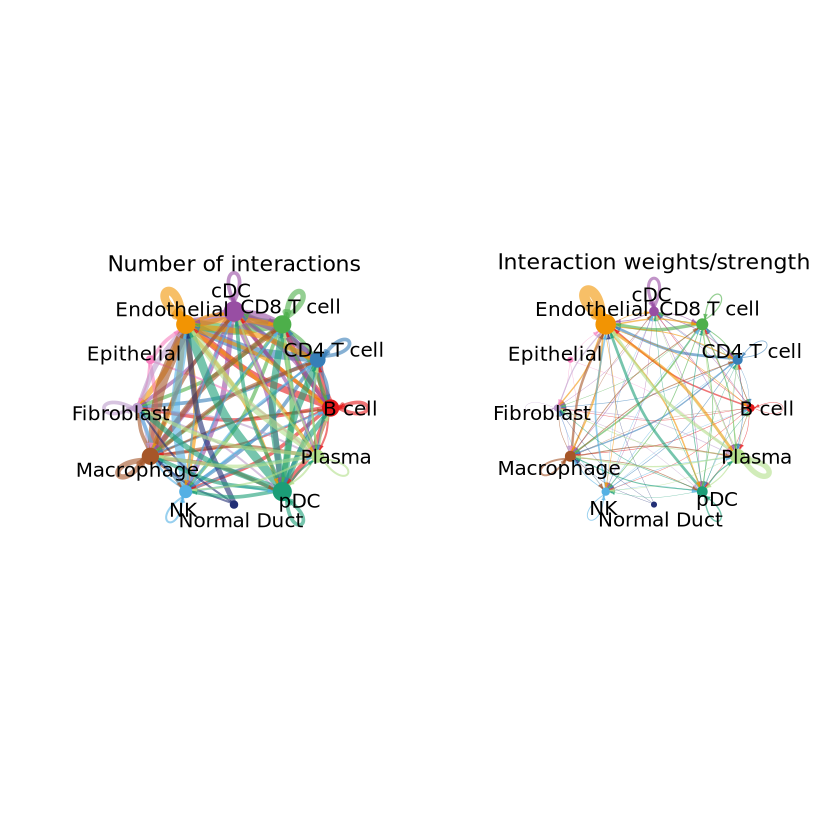

In [15]:
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,2), xpd=TRUE)
netVisual_circle(cellchat@net$count, vertex.weight = rowSums(cellchat@net$count), weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(cellchat@net$weight, vertex.weight = rowSums(cellchat@net$weight), weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

Do heatmap based on a single object 




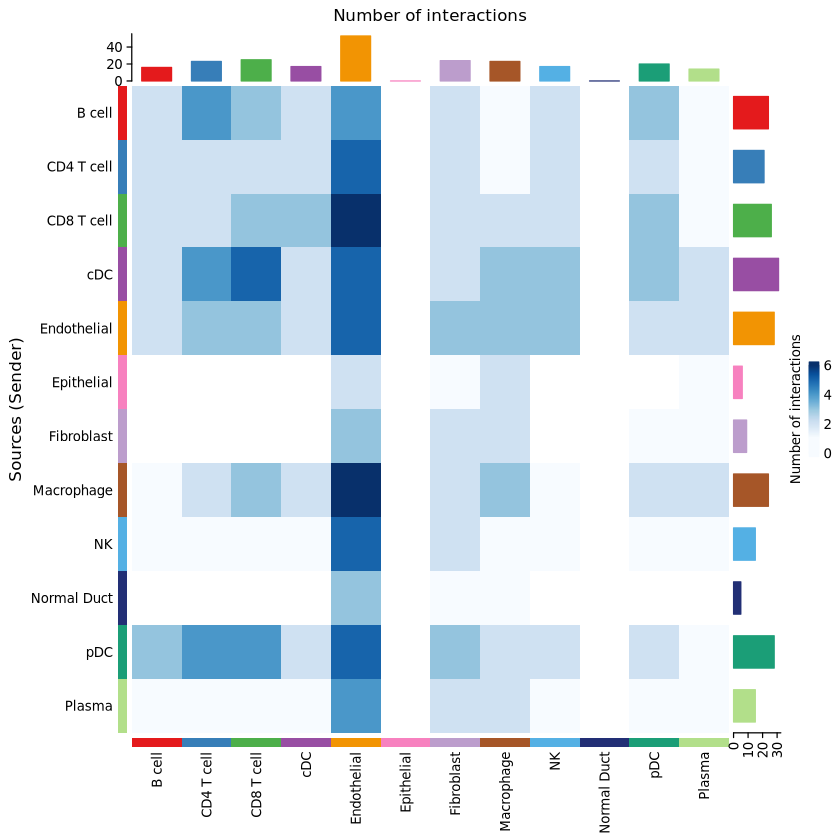

In [16]:
netVisual_heatmap(cellchat, measure = "count", color.heatmap = "Blues")

Do heatmap based on a single object 




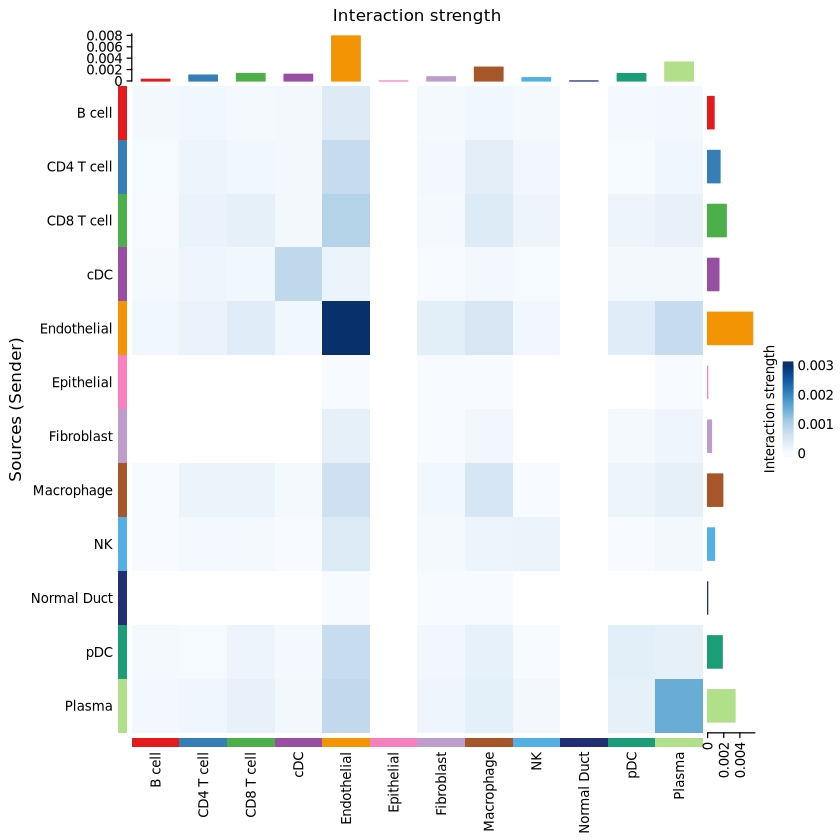

In [17]:
netVisual_heatmap(cellchat, measure = "weight", color.heatmap = "Blues")

In [18]:
df.net <- subsetCommunication(cellchat)
head(df.net)

source      target ligand receptor prob         pval interaction_name
1 B cell      B cell CCL19  CCR7     3.789039e-05 0    CCL19_CCR7      
2 CD4 T cell  B cell CCL19  CCR7     1.056579e-05 0    CCL19_CCR7      
3 CD8 T cell  B cell CCL19  CCR7     2.653432e-06 0    CCL19_CCR7      
4 cDC         B cell CCL19  CCR7     2.779462e-05 0    CCL19_CCR7      
5 Endothelial B cell CCL19  CCR7     4.990868e-06 0    CCL19_CCR7      
6 pDC         B cell CCL19  CCR7     5.967505e-07 0    CCL19_CCR7      
  interaction_name_2 pathway_name annotation         evidence      
1 CCL19 - CCR7       CCL          Secreted Signaling KEGG: hsa04060
2 CCL19 - CCR7       CCL          Secreted Signaling KEGG: hsa04060
3 CCL19 - CCR7       CCL          Secreted Signaling KEGG: hsa04060
4 CCL19 - CCR7       CCL          Secreted Signaling KEGG: hsa04060
5 CCL19 - CCR7       CCL          Secreted Signaling KEGG: hsa04060
6 CCL19 - CCR7       CCL          Secreted Signaling KEGG: hsa04060

In [19]:
unique(df.net$interaction_name)

[1] CCL19_CCR7    CCL5_ACKR1    CXCL2_ACKR1   CXCL9_ACKR1   CXCL10_ACKR1 
 [6] EDN1_EDNRB    PTPRC_MRC1    CD86_CD28     CD86_CTLA4    CLEC2C_KLRB1 
[11] PECAM1_PECAM1 SELL_CD34    
16 Levels: CCL27_CCR2 CCL19_CCR7 CCL5_ACKR1 CXCL2_ACKR1 ... SELL_CD34

In [20]:
unique(df.net$pathway_name)

[1] "CCL"    "CXCL"   "EDN"    "CD45"   "CD86"   "CLEC"   "PECAM1" "SELL"

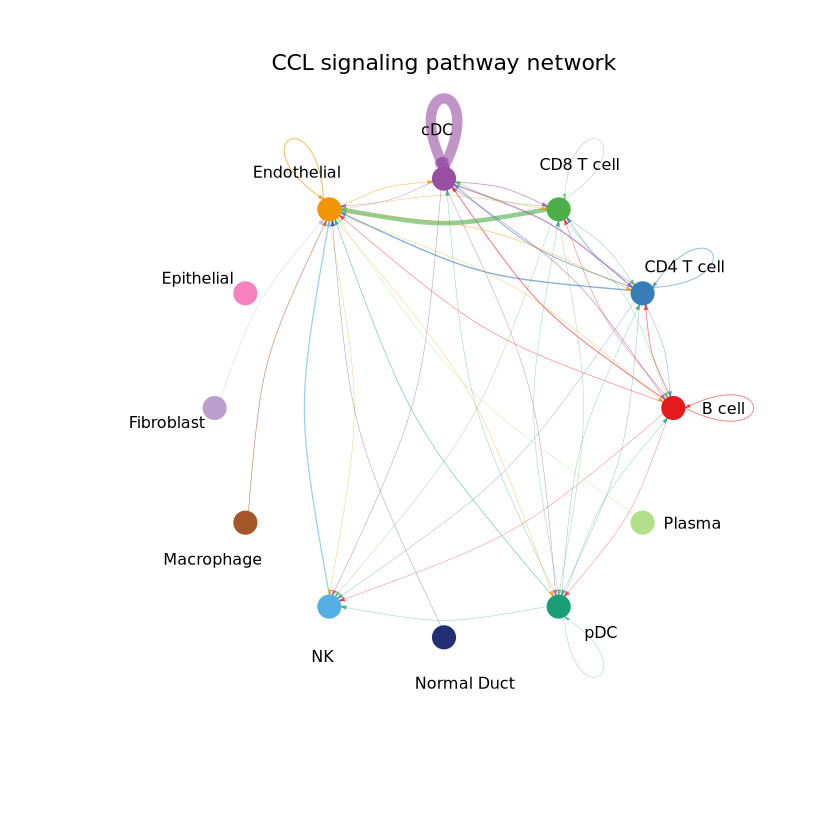

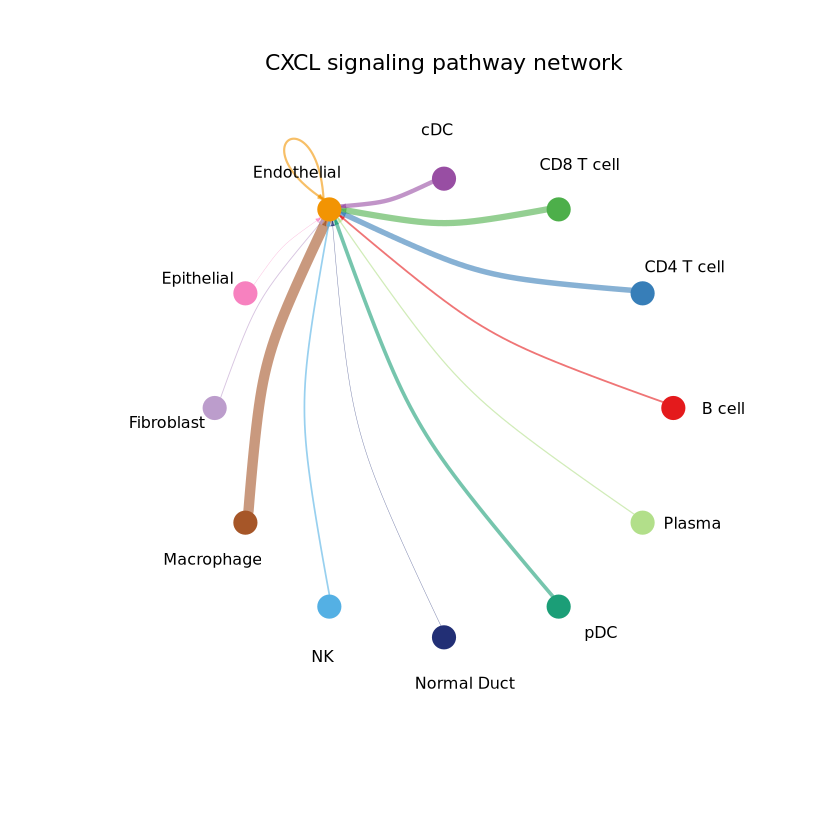

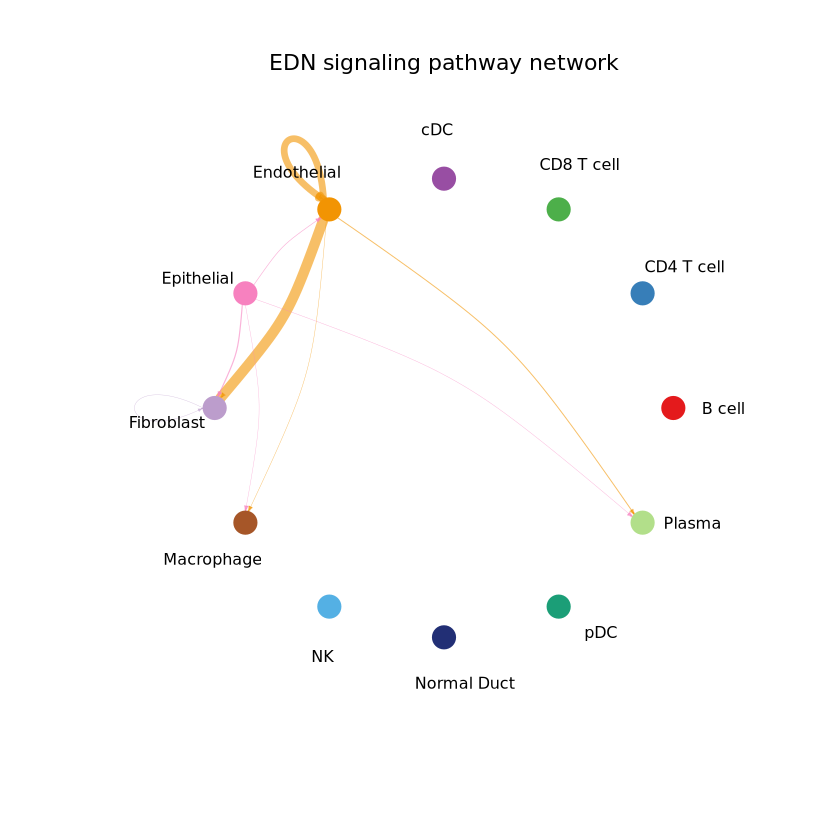

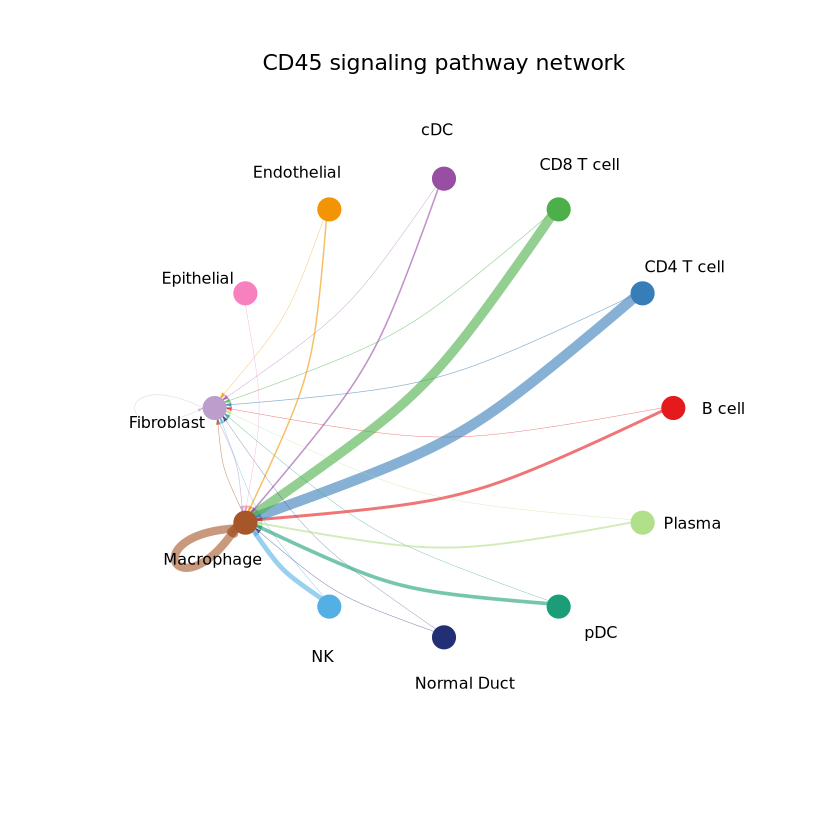

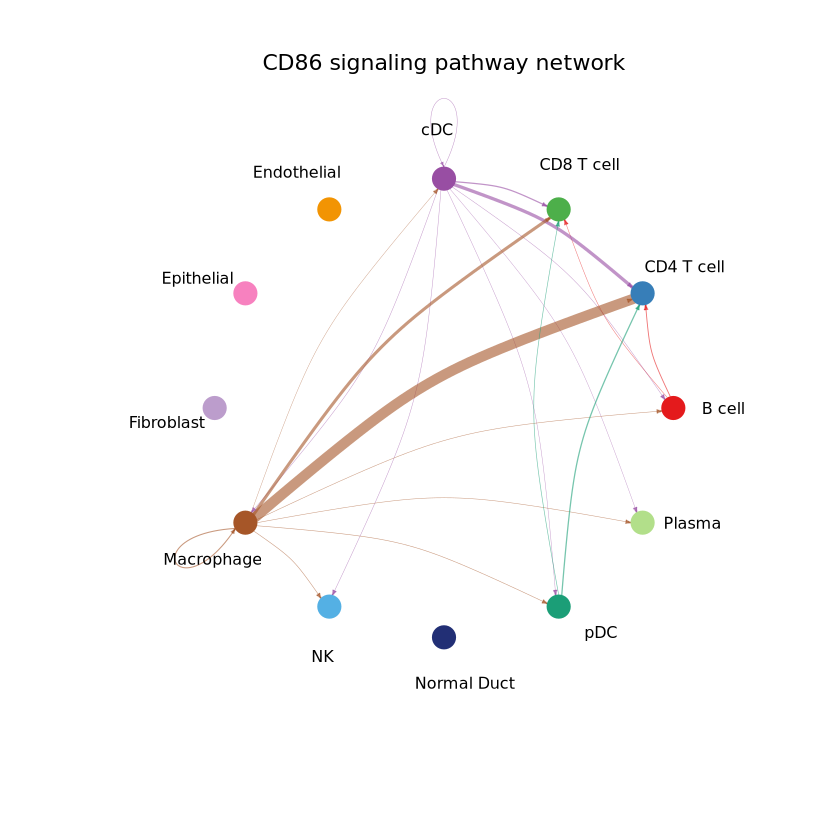

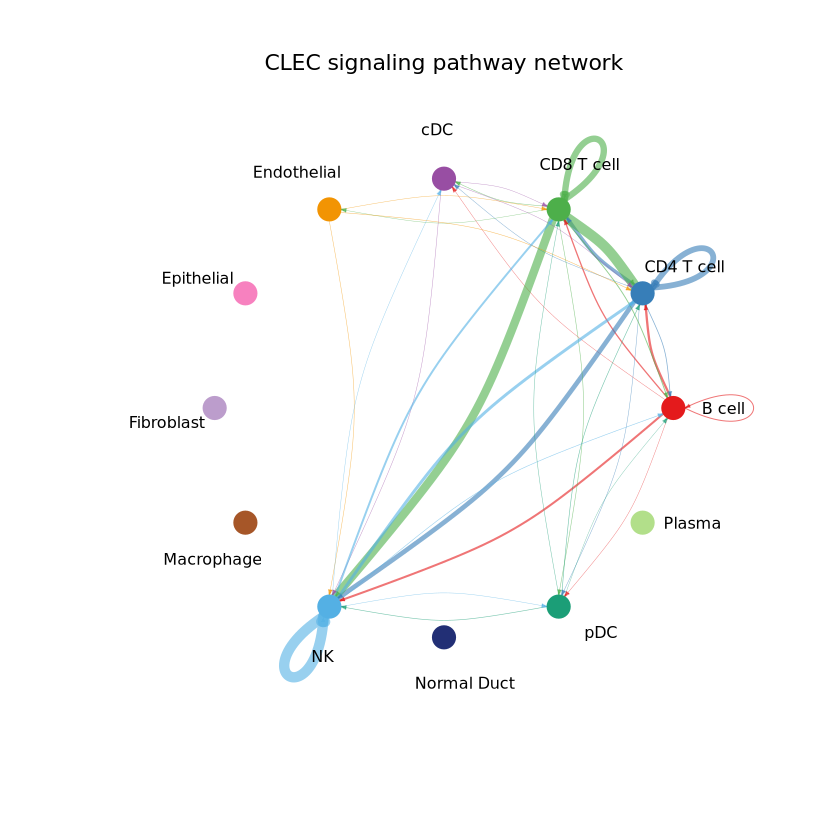

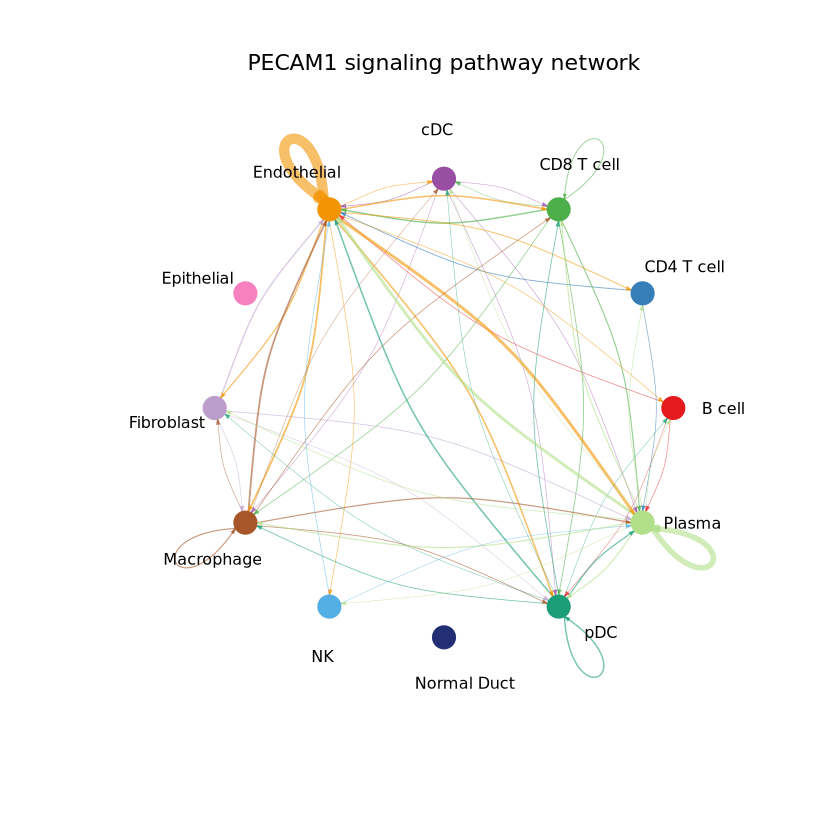

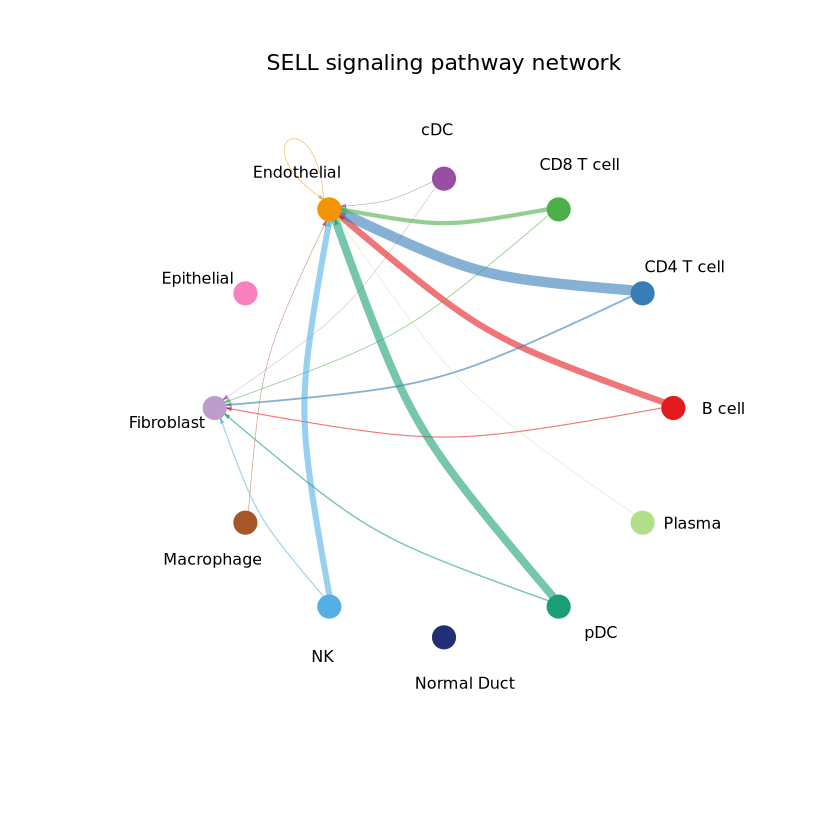

In [21]:
for (pathway in unique(df.net$pathway_name)) {
    par(mfrow=c(1,1), xpd = TRUE) # `xpd = TRUE` should be added to show the title
    netVisual_aggregate(cellchat, signaling = c(pathway), layout = "circle")
}


In [24]:
unique(meta$samples)

[1] "HT206B1-U1"  "HT206B1-U8"  "HT206B1-U9"  "HT206B1-U16" "HT206B1-U17"
[6] "HT206B1-U24"

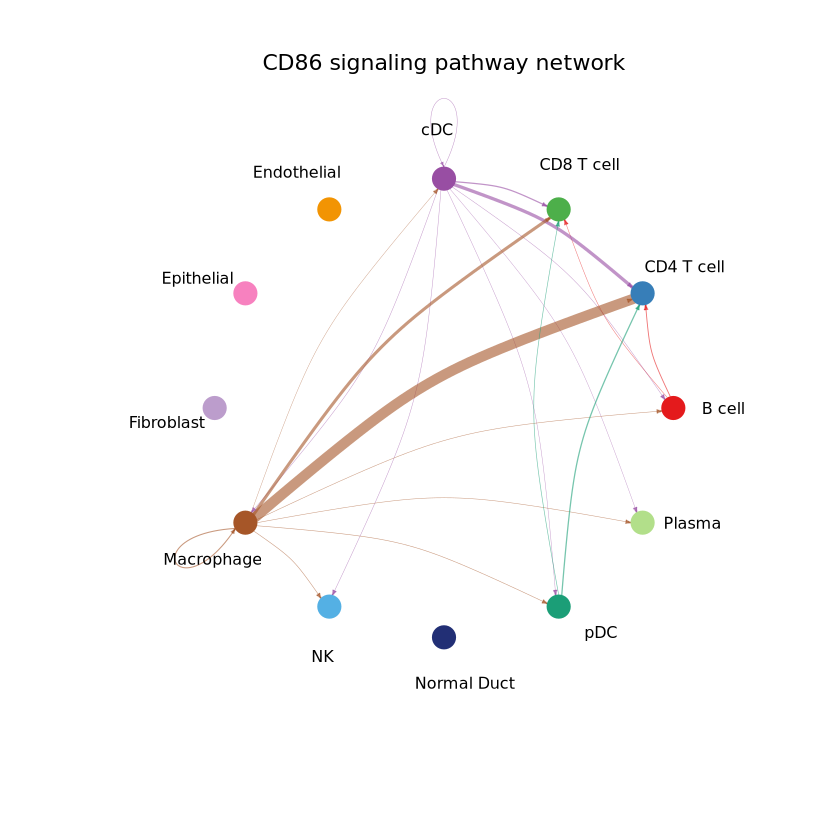

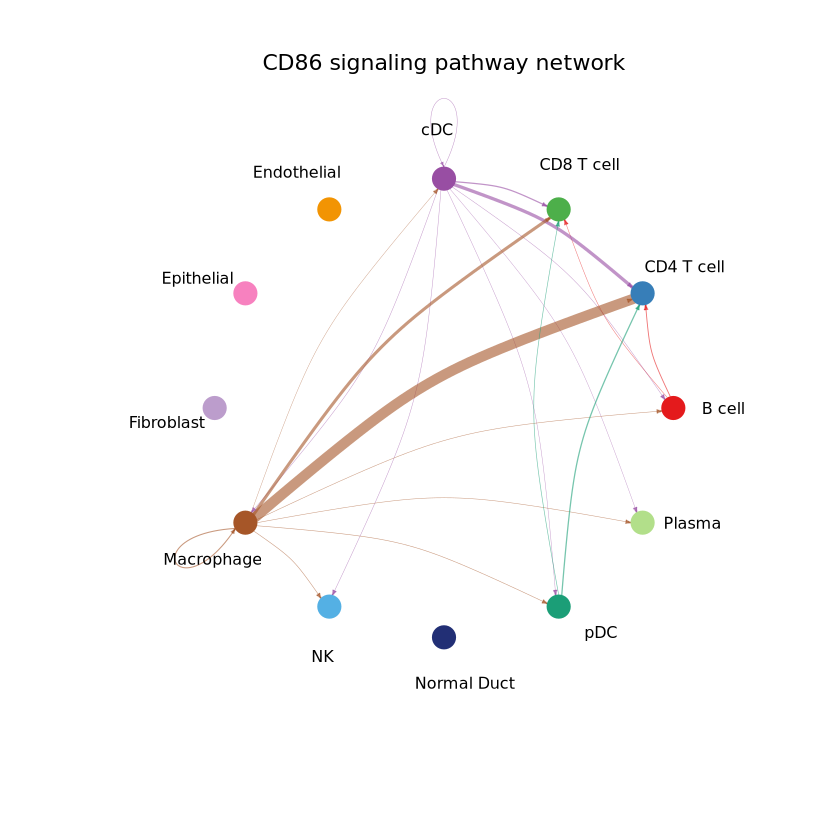

In [27]:
par(mfrow=c(1,1), xpd = TRUE) # `xpd = TRUE` should be added to show the title
netVisual_aggregate(cellchat, signaling = c(pathway), layout = "circle", sample.use = "HT206B1-U1")

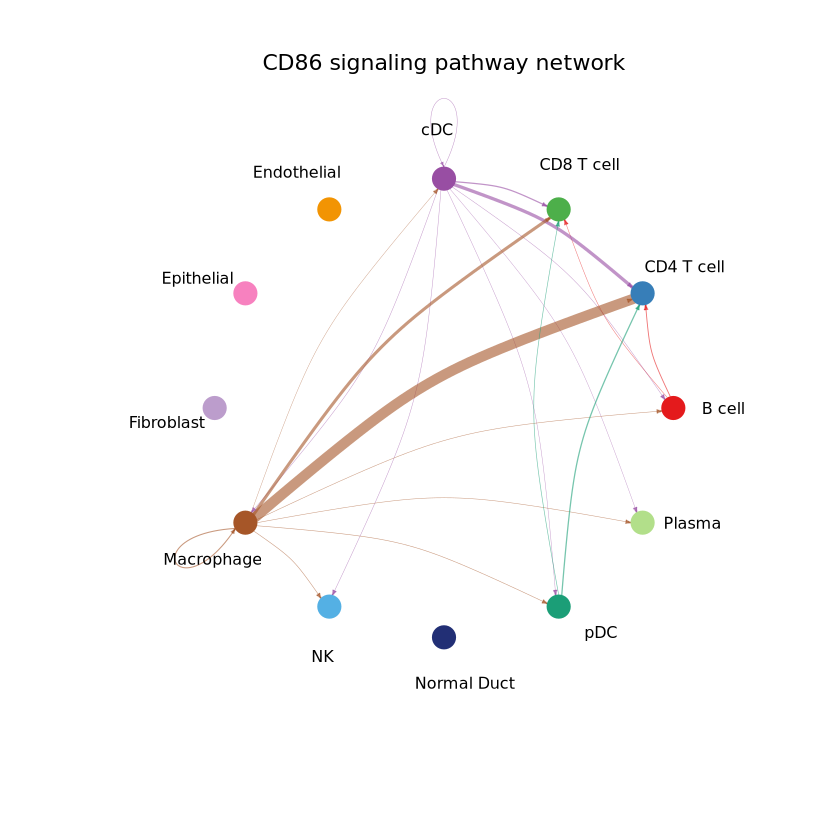

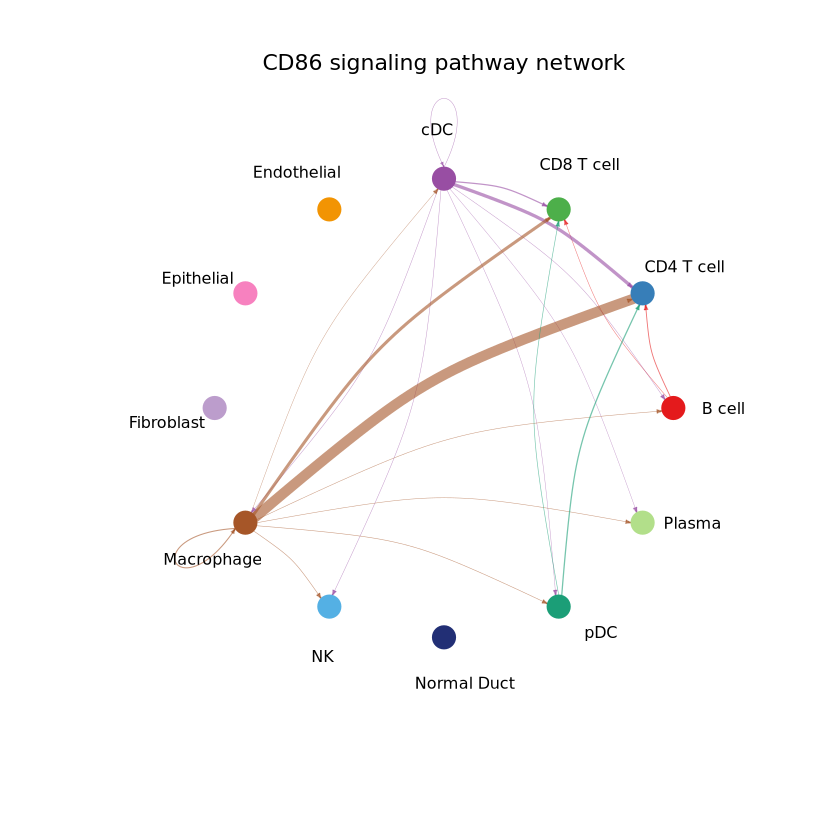

In [28]:
par(mfrow=c(1,1), xpd = TRUE) # `xpd = TRUE` should be added to show the title
netVisual_aggregate(cellchat, signaling = c(pathway), layout = "circle", sample.use = "HT206B1-U24")

In [29]:
unique(cellchat@meta$samples)

[1] HT206B1-U1  HT206B1-U8  HT206B1-U9  HT206B1-U16 HT206B1-U17 HT206B1-U24
6 Levels: HT206B1-U1 HT206B1-U16 HT206B1-U17 HT206B1-U24 ... HT206B1-U9

In [23]:
?netVisual_aggregate

netVisual_aggregate          package:CellChat          R Documentation

_V_i_s_u_a_l_i_z_e _t_h_e _i_n_f_e_r_r_e_d _s_i_g_n_a_l_i_n_g _n_e_t_w_o_r_k _o_f _s_i_g_n_a_l_i_n_g _p_a_t_h_w_a_y_s _b_y
_a_g_g_r_e_g_a_t_i_n_g _a_l_l _L-_R _p_a_i_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     Visualize the inferred signaling network of signaling pathways by
     aggregating all L-R pairs

_U_s_a_g_e:

     netVisual_aggregate(
       object,
       signaling,
       signaling.name = NULL,
       color.use = NULL,
       thresh = 0.05,
       vertex.receiver = NULL,
       sources.use = NULL,
       targets.use = NULL,
       idents.use = NULL,
       top = 1,
       remove.isolate = FALSE,
       vertex.weight = 1,
       vertex.weight.max = NULL,
       vertex.size.max = NULL,
       weight.scale = TRUE,
       edge.weight.max = NULL,
       edge.width.max = 8,
       layout = c("circle", "hierarchy", "chord", "spatial"),
       pt.title = 12,
       title.space = 6,
       vertex.label.cex = 0.8,
       sample.use = NULL,
       alpha.image = 0.15,
       point.size = 1.5,
       group = NULL,
       cell.order = NULL,
       small.gap = 1,
       big.gap = 10,
       scale = FALSE,
       reduce = -1,
       show.legend = FALSE,
       legend.pos.x = 20,
       legend.pos.y = 20,
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

  object: CellChat object

signaling: a signaling pathway name

signaling.name: alternative signaling pathway name to show on the plot

color.use: the character vector defining the color of each cell group

  thresh: threshold of the p-value for determining significant
          interaction

vertex.receiver: a numeric vector giving the index of the cell groups
          as targets in the first hierarchy plot

sources.use: a vector giving the index or the name of source cell
          groups

targets.use: a vector giving the index or the name of target cell
          groups.

idents.use: a vector giving the index or the name of cell groups of
          interest.

     top: the fraction of interactions to show

remove.isolate: whether remove the isolate nodes in the communication
          network

vertex.weight: The weight of vertex: either a scale value or a vector

          Default is a scale value being 1, indicating all vertex is
          plotted in the same size;

          Set `vertex.weight` as a vector to plot vertex in different
          size; setting `vertex.weight = NULL` will have vertex with
          different size that are portional to the number of cells in
          each cell group.

vertex.weight.max: the maximum weight of vertex; defualt =
          max(vertex.weight)

vertex.size.max: the maximum vertex size for visualization

weight.scale: whether scale the edge weight

edge.weight.max: the maximum weight of edge; defualt = max(net)

edge.width.max: The maximum edge width for visualization

  layout: "hierarchy", "circle", "chord" or "spatial"

pt.title: font size of the text

title.space: the space between the title and plot

vertex.label.cex: The label size of vertex in the network

          Parameters below are set for "spatial" diagram. Please also
          check the function `netVisual_spatial` for more parameters.

sample.use: the sample used for visualization, which should be the
          element in `object@meta$samples`.

alpha.image: the transparency of individual spots

point.size: the size of spots

          Parameters below are set for "chord" diagram. Please also
          check the function `netVisual_chord_cell` for more
          parameters.

   group: A named group labels for making multiple-group Chord
          diagrams. The sector names should be used as the names in the
          vector. The order of group controls the sector orders and if
          group is set as a factor, the order of levels controls the
          order of groups.

cell.order: a char vector defining the cel

In [22]:
pathway = 'CD86'

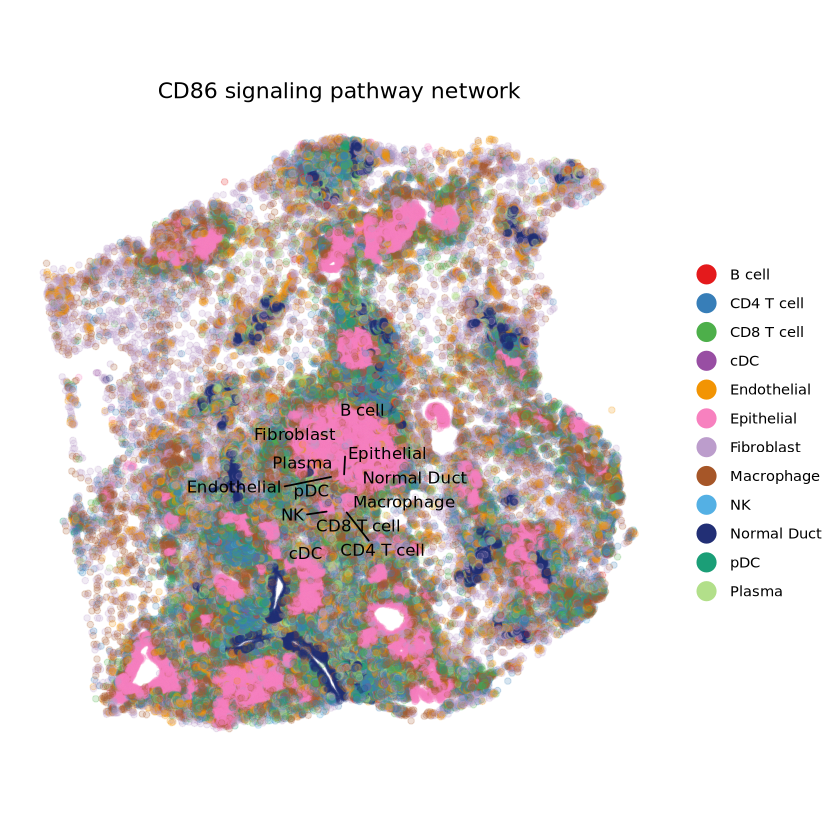

In [31]:
par(mfrow=c(1,1))
netVisual_aggregate(cellchat, signaling = c(pathway), layout = "spatial", edge.width.max = 2, vertex.size.max = 1, alpha.image = 0.2, vertex.label.cex = 3.5, sample.use = "HT206B1-U24")



In [35]:
?netVisual_aggregate

netVisual_aggregate          package:CellChat          R Documentation

_V_i_s_u_a_l_i_z_e _t_h_e _i_n_f_e_r_r_e_d _s_i_g_n_a_l_i_n_g _n_e_t_w_o_r_k _o_f _s_i_g_n_a_l_i_n_g _p_a_t_h_w_a_y_s _b_y
_a_g_g_r_e_g_a_t_i_n_g _a_l_l _L-_R _p_a_i_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     Visualize the inferred signaling network of signaling pathways by
     aggregating all L-R pairs

_U_s_a_g_e:

     netVisual_aggregate(
       object,
       signaling,
       signaling.name = NULL,
       color.use = NULL,
       thresh = 0.05,
       vertex.receiver = NULL,
       sources.use = NULL,
       targets.use = NULL,
       idents.use = NULL,
       top = 1,
       remove.isolate = FALSE,
       vertex.weight = 1,
       vertex.weight.max = NULL,
       vertex.size.max = NULL,
       weight.scale = TRUE,
       edge.weight.max = NULL,
       edge.width.max = 8,
       layout = c("circle", "hierarchy", "chord", "spatial"),
       pt.title = 12,
       title.space = 6,
       vertex.label.cex = 0.8,
       sample.use = NULL,
       alpha.image = 0.15,
       point.size = 1.5,
       group = NULL,
       cell.order = NULL,
       small.gap = 1,
       big.gap = 10,
       scale = FALSE,
       reduce = -1,
       show.legend = FALSE,
       legend.pos.x = 20,
       legend.pos.y = 20,
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

  object: CellChat object

signaling: a signaling pathway name

signaling.name: alternative signaling pathway name to show on the plot

color.use: the character vector defining the color of each cell group

  thresh: threshold of the p-value for determining significant
          interaction

vertex.receiver: a numeric vector giving the index of the cell groups
          as targets in the first hierarchy plot

sources.use: a vector giving the index or the name of source cell
          groups

targets.use: a vector giving the index or the name of target cell
          groups.

idents.use: a vector giving the index or the name of cell groups of
          interest.

     top: the fraction of interactions to show

remove.isolate: whether remove the isolate nodes in the communication
          network

vertex.weight: The weight of vertex: either a scale value or a vector

          Default is a scale value being 1, indicating all vertex is
          plotted in the same size;

          Set `vertex.weight` as a vector to plot vertex in different
          size; setting `vertex.weight = NULL` will have vertex with
          different size that are portional to the number of cells in
          each cell group.

vertex.weight.max: the maximum weight of vertex; defualt =
          max(vertex.weight)

vertex.size.max: the maximum vertex size for visualization

weight.scale: whether scale the edge weight

edge.weight.max: the maximum weight of edge; defualt = max(net)

edge.width.max: The maximum edge width for visualization

  layout: "hierarchy", "circle", "chord" or "spatial"

pt.title: font size of the text

title.space: the space between the title and plot

vertex.label.cex: The label size of vertex in the network

          Parameters below are set for "spatial" diagram. Please also
          check the function `netVisual_spatial` for more parameters.

sample.use: the sample used for visualization, which should be the
          element in `object@meta$samples`.

alpha.image: the transparency of individual spots

point.size: the size of spots

          Parameters below are set for "chord" diagram. Please also
          check the function `netVisual_chord_cell` for more
          parameters.

   group: A named group labels for making multiple-group Chord
          diagrams. The sector names should be used as the names in the
          vector. The order of group controls the sector orders and if
          group is set as a factor, the order of levels controls the
          order of groups.

cell.order: a char vector defining the cel

In [36]:
# # Compute the network centrality scores
# cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") # the slot 'netP' means the inferred intercellular communication network of signaling pathways

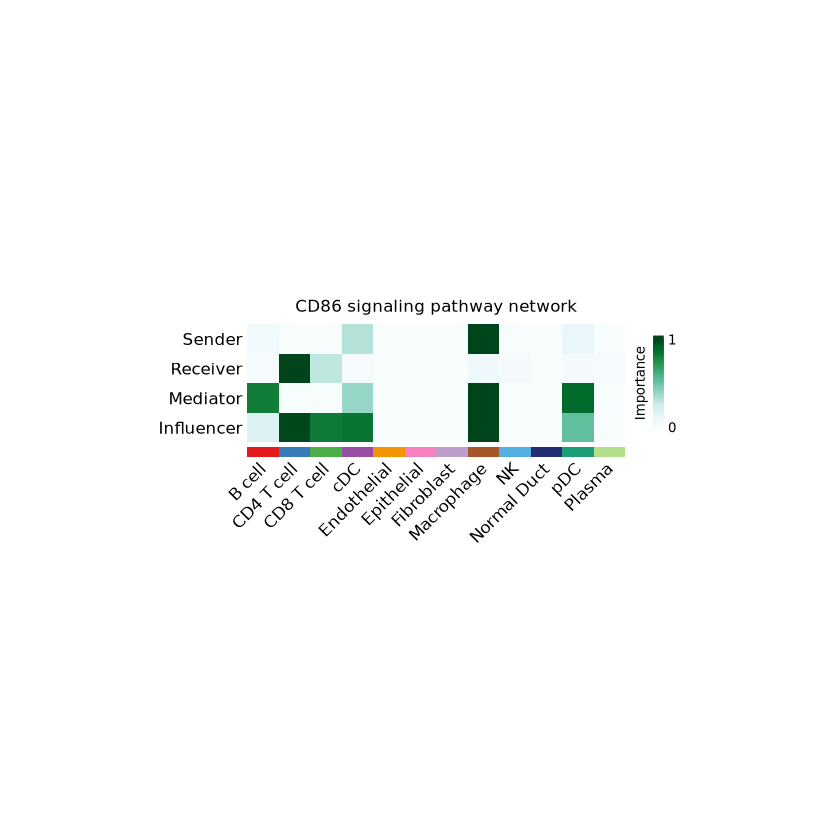

In [32]:
# Visualize the computed centrality scores using heatmap, allowing ready identification of major signaling roles of cell groups
# par(mfrow=c(1,1))
netAnalysis_signalingRole_network(cellchat, signaling = c(pathway), width = 8, height = 2.5, font.size = 10)

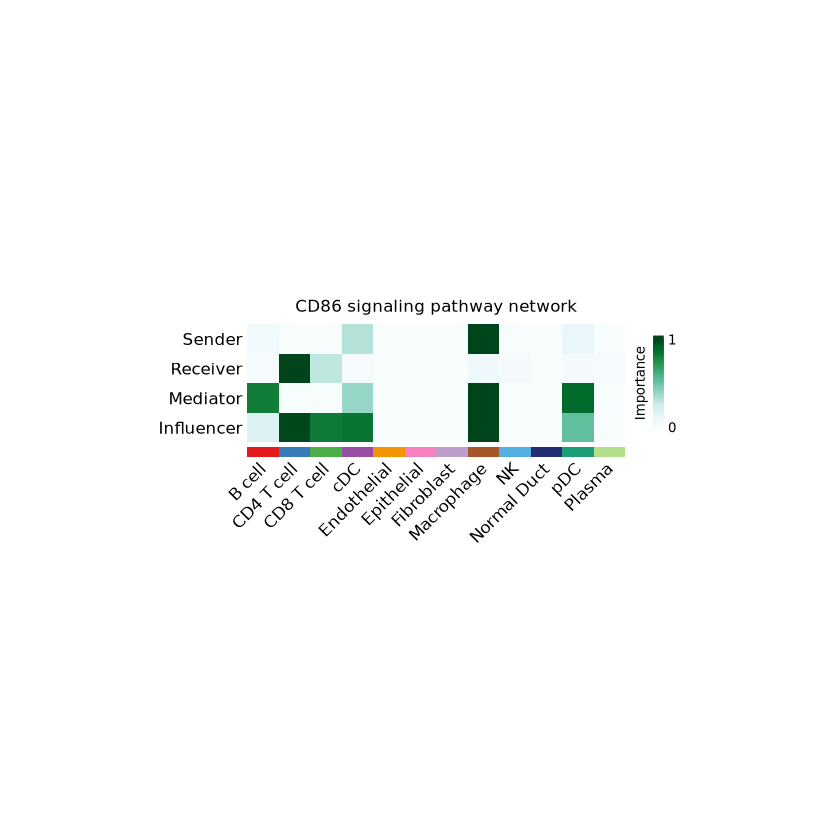

In [34]:
# sample.use = "HT206B1-U24"
netAnalysis_signalingRole_network(cellchat, signaling = c(pathway), width = 8, height = 2.5, font.size = 10)

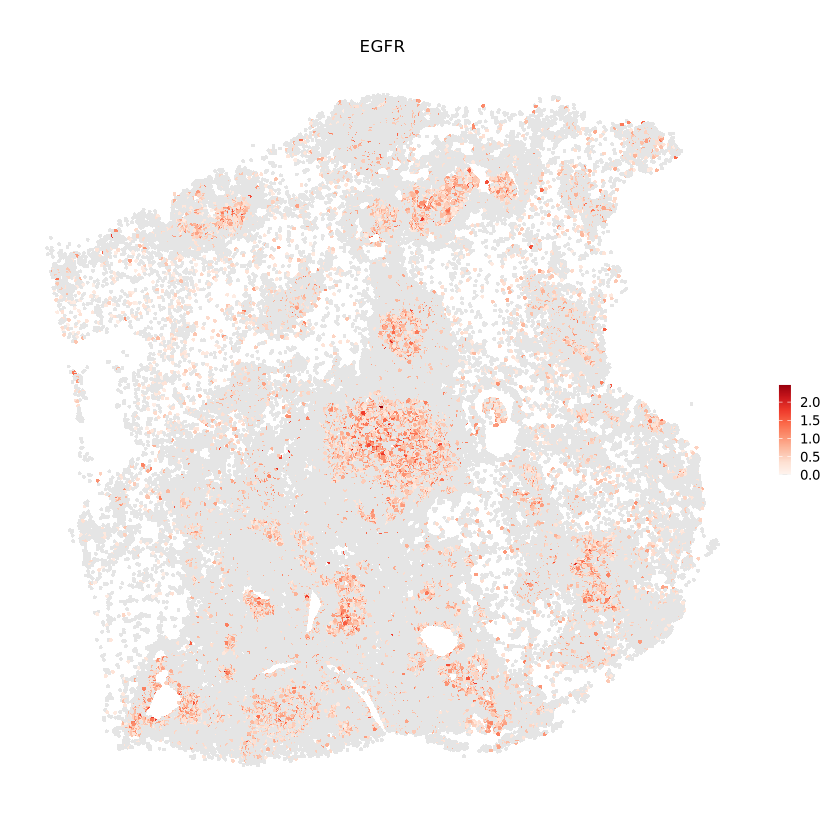

In [35]:
spatialFeaturePlot(cellchat, features = c("AREG","EGFR"), point.size = 0.8, color.heatmap = "Reds", direction = 1, sample.use = "HT206B1-U24")

Applying a cutoff of  0.05 to the values... 


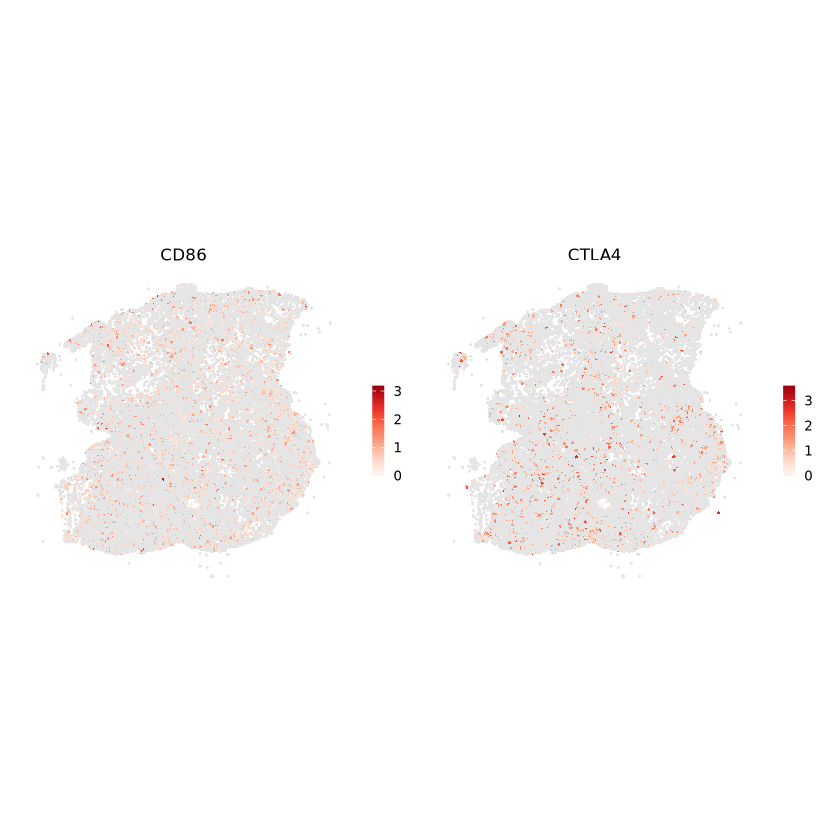

In [38]:
spatialFeaturePlot(cellchat, pairLR.use = "CD86_CTLA4", point.size = 0.5, do.binary = FALSE, cutoff = 0.05, enriched.only = F, color.heatmap = "Reds", direction = 1)

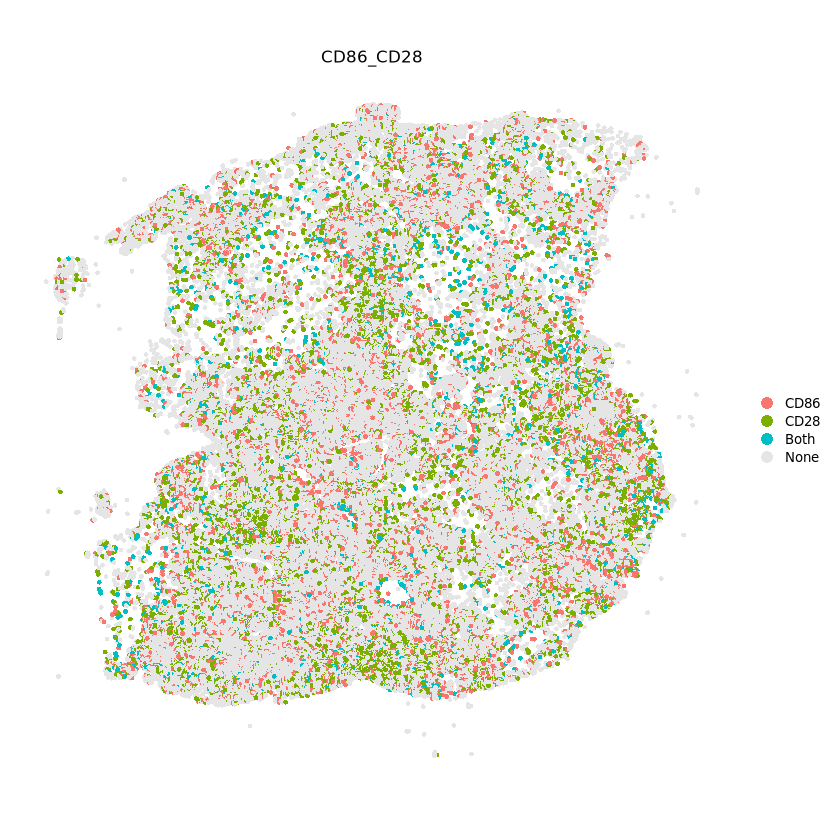

In [40]:
spatialFeaturePlot(cellchat, pairLR.use = "CD86_CD28", point.size = 1, do.binary = TRUE, cutoff = 0.05, enriched.only = F, color.heatmap = "Reds", direction = 1)

In [ ]:
AREG_EGFR_ERBB2

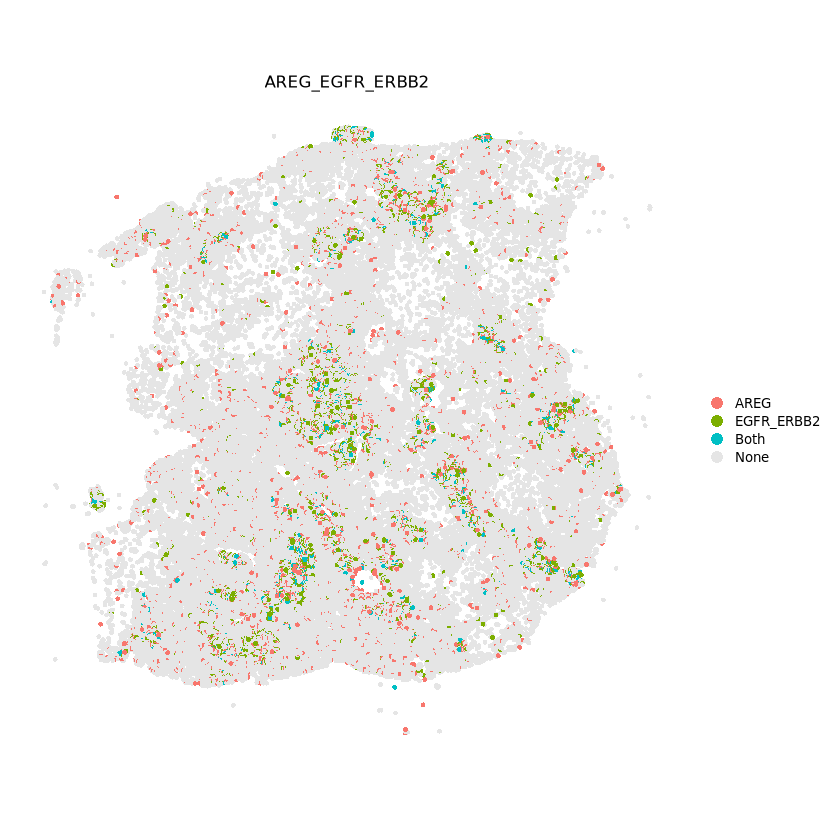

In [20]:
spatialFeaturePlot(cellchat, pairLR.use = "AREG_EGFR_ERBB2", point.size = 1, do.binary = TRUE, cutoff = 0.05, enriched.only = F, color.heatmap = "Reds", direction = 1)

In [17]:
cellchat <- createCellChat(object = data_input, meta = meta, group.by = "labels",
                           datatype = "spatial", coordinates = coordinates, spatial.factors = spatial_factors)

[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in createCellChat(object = data_input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor!”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Adipocytes, B-cells, Cancer cells, CD4 T cells, CD8 T cells, Endothelial, Fibroblasts, Macrophages, Mast cells, mregDC, Myoepitelial/Normal ducts, NK cells, pDC, Plasma cells, Treg 


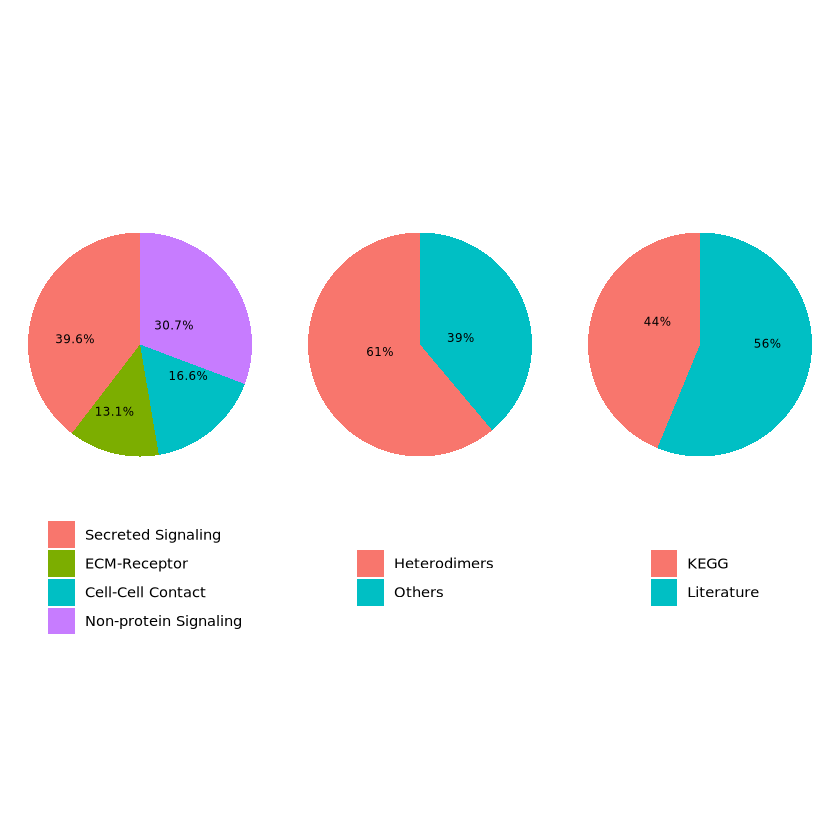

In [18]:
CellChatDB <- CellChatDB.human
showDatabaseCategory(CellChatDB)

In [19]:
dplyr::glimpse(CellChatDB$interaction)

Rows: 3,234
Columns: 28
$ interaction_name         <chr> "TGFB1_TGFBR1_TGFBR2", "TGFB2_TGFBR1_TGFBR2",…
$ pathway_name             <chr> "TGFb", "TGFb", "TGFb", "TGFb", "TGFb", "TGFb…
$ ligand                   <chr> "TGFB1", "TGFB2", "TGFB3", "TGFB1", "TGFB1", …
$ receptor                 <chr> "TGFbR1_R2", "TGFbR1_R2", "TGFbR1_R2", "ACVR1…
$ agonist                  <chr> "TGFb agonist", "TGFb agonist", "TGFb agonist…
$ antagonist               <chr> "TGFb antagonist", "TGFb antagonist", "TGFb a…
$ co_A_receptor            <chr> "", "", "", "", "", "", "", "", "", "", "", "…
$ co_I_receptor            <chr> "TGFb inhibition receptor", "TGFb inhibition …
$ evidence                 <chr> "KEGG: hsa04350", "KEGG: hsa04350", "KEGG: hs…
$ annotation               <chr> "Secreted Signaling", "Secreted Signaling", "…
$ interaction_name_2       <chr> "TGFB1 - (TGFBR1+TGFBR2)", "TGFB2 - (TGFBR1+T…
$ is_neurotransmitter      <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL…
$ ligand.symbol 

In [32]:
# CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling", key = "annotation") # use Secreted Signaling
CellChatDB.use <- subsetDB(CellChatDB)
# CellChatDB.use <- subsetDB(CellChatDB, key = "annotation")

In [33]:
cellchat@DB <- CellChatDB.use

In [34]:
cellchat <- subsetData(cellchat) # This step is necessary even if using the whole database

In [37]:
future::plan("multisession", workers = 4) 
cellchat <- identifyOverExpressedGenes(cellchat, do.fast = FALSE)
cellchat <- identifyOverExpressedInteractions(cellchat, variable.both = F)

The number of highly variable ligand-receptor pairs used for signaling inference is 26 


In [42]:
# cellchat <- computeCommunProb(cellchat, type = "truncatedMean", trim = 0.1,
#                               distance.use = TRUE, interaction.range = 250, scale.distance = 0.01,
#                               contact.dependent = TRUE, contact.range = 10)
cellchat <- computeCommunProb(cellchat, type = "truncatedMean", trim = 0.1,
                              distance.use = TRUE, interaction.range = 250, scale.distance = 6.8,
                              contact.dependent = TRUE, contact.range = 10)
# cellchat <- computeCommunProb(cellchat, type = "truncatedMean", trim = 0.1,
#                               distance.use = TRUE, interaction.range = 250, scale.distance = 0.01,
#                               contact.dependent = FALSE)

truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-04-24 20:27:52.711646]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-04-24 20:29:07.922732]"


In [43]:
cellchat <- filterCommunication(cellchat, min.cells = 10)

In [44]:
cellchat <- computeCommunProbPathway(cellchat)

In [45]:
cellchat <- aggregateNet(cellchat)

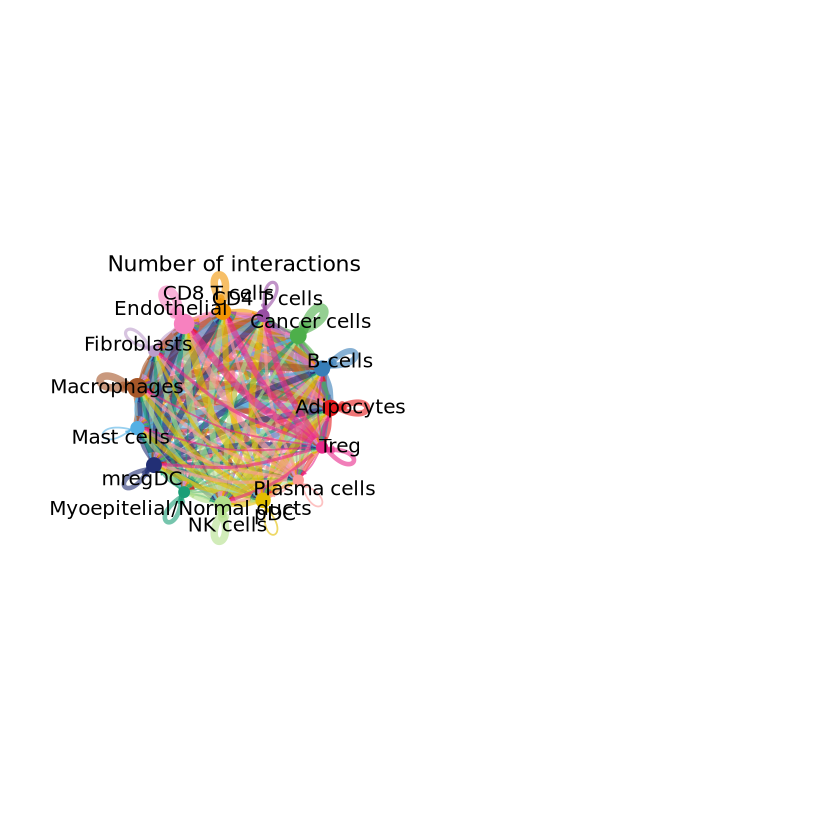

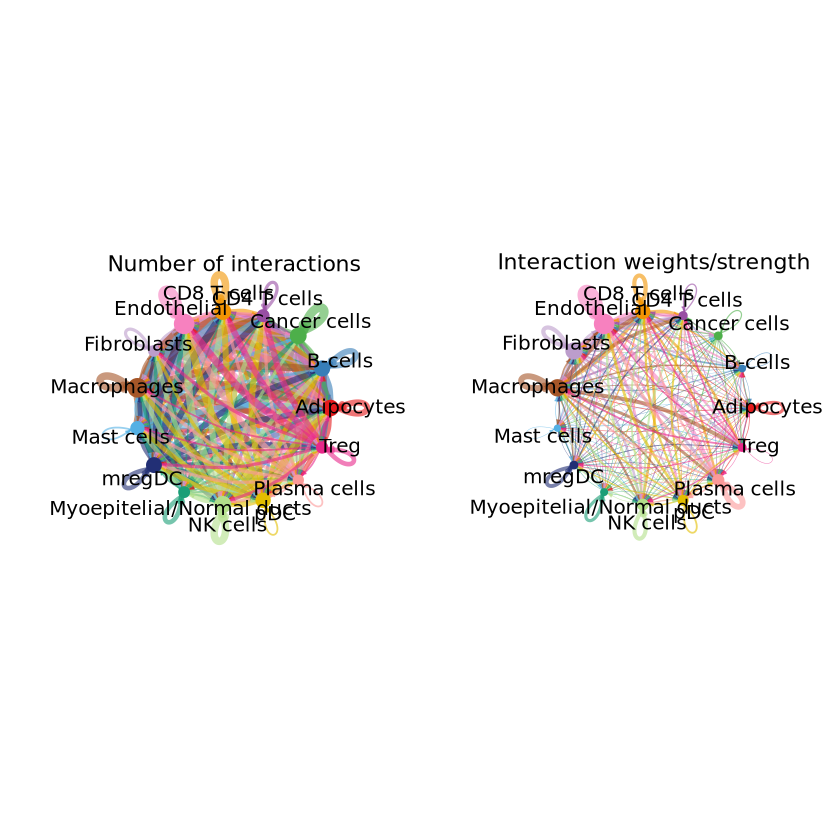

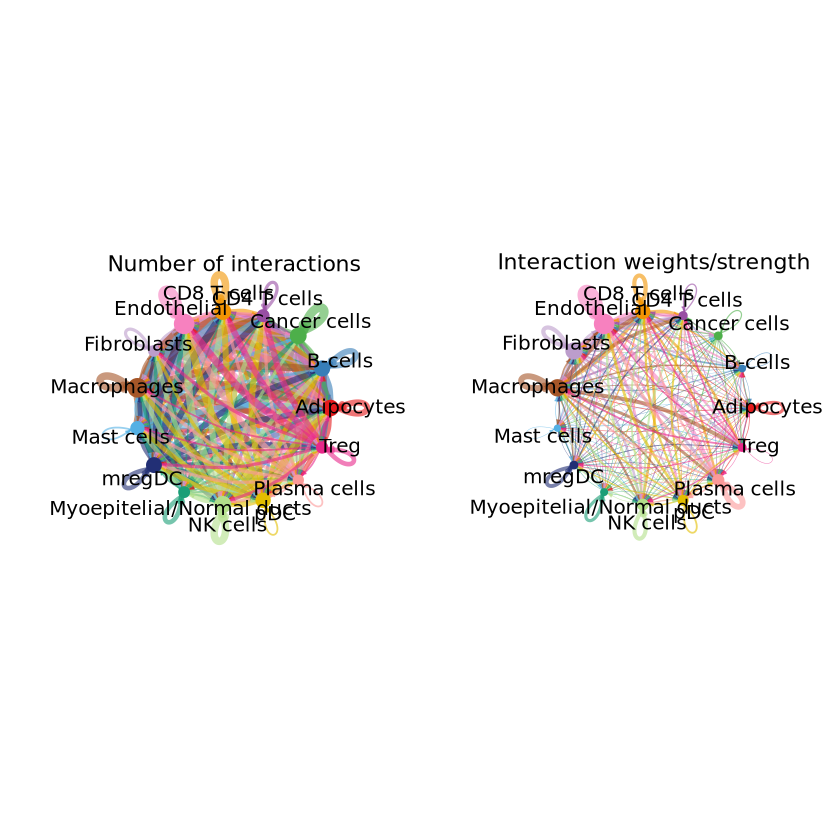

In [46]:
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,2), xpd=TRUE)
netVisual_circle(cellchat@net$count, vertex.weight = rowSums(cellchat@net$count), weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(cellchat@net$weight, vertex.weight = rowSums(cellchat@net$weight), weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

Do heatmap based on a single object 




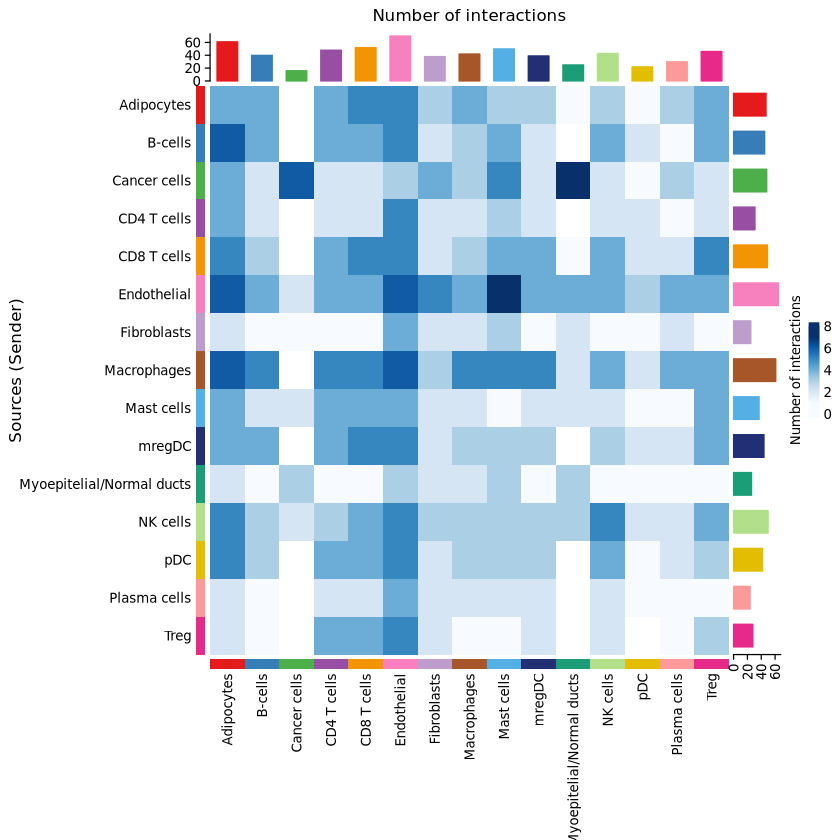

In [47]:
netVisual_heatmap(cellchat, measure = "count", color.heatmap = "Blues")

Do heatmap based on a single object 




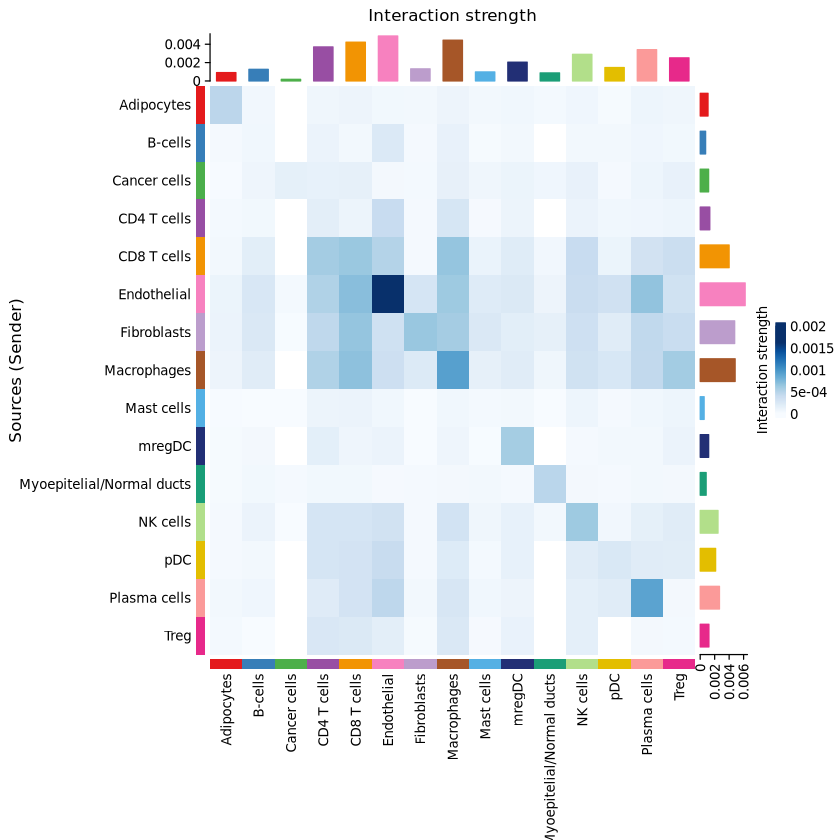

In [48]:
netVisual_heatmap(cellchat, measure = "weight", color.heatmap = "Blues")

In [50]:
cellchat

An object of class CellChat created from a single dataset 
 477 genes.
 111732 cells. 
CellChat analysis of spatial data! The input spatial locations are 
           x_cent y_cent
aaaagokl-1   1441    871
aaaaippd-1   1468    860
aaaajeja-1   1411    855
aaablpen-1   1449    858
aaaclnhj-1   1441    844
aaadfacg-1   1458    841

In [51]:
cellchat@netP

$pathways
 [1] "FN1"     "PECAM1"  "CD45"    "CCL"     "CLEC"    "SELL"    "SPP1"   
 [8] "CD86"    "LAMININ" "CDH"     "CXCL"    "EPHB"    "EDN"     "KIT"    
[15] "NCAM"    "EGF"    

$prob
, , FN1

                            Adipocytes      B-cells Cancer cells  CD4 T cells
Adipocytes                3.553437e-04 4.170029e-05            0 5.790315e-05
B-cells                   0.000000e+00 0.000000e+00            0 0.000000e+00
Cancer cells              0.000000e+00 5.146571e-05            0 9.042370e-05
CD4 T cells               0.000000e+00 0.000000e+00            0 0.000000e+00
CD8 T cells               0.000000e+00 1.484679e-04            0 4.396328e-04
Endothelial               5.151854e-05 1.718135e-04            0 3.794428e-04
Fibroblasts               8.847096e-05 2.270483e-04            0 4.376299e-04
Macrophages               4.034860e-05 1.364262e-04            0 3.690137e-04
Mast cells                0.000000e+00 0.000000e+00            0 7.279194e-05
mregDC                    0.000000e+00 0.000000e+00            0 0.000000e+00
Myoepitelial/Normal ducts 0.000000e+00 0.000000e+00            0 0.000000e+00
NK cells                  0.000000e+00 8.742863e-05            0 2.329426e-04
pDC                       0.000000e+00 0.000000e+00            0 2.226492e-04
Plasma cells              0.000000e+00 0.000000e+00            0 1.334360e-04
Treg                      0.000000e+00 0.000000e+00            0 2.242014e-04
                           CD8 T cells  Endothelial  Fibroblasts  Macrophages
Adipocytes                6.701056e-05 0.0000000000 0.0000355007 4.756945e-05
B-cells                   0.000000e+00 0.0000000000 0.0000000000 0.000000e+00
Cancer cells              9.700027e-05 0.0000000000 0.0000000000 9.181623e-05
CD4 T cells               0.000000e+00 0.0000000000 0.0000000000 0.000000e+00
CD8 T cells               4.511115e-04 0.0000000000 0.0000000000 2.414218e-04
Endothelial               4.464267e-04 0.0003131306 0.0002079208 2.960036e-04
Fibroblasts               6.424430e-04 0.0002784574 0.0006275554 5.536064e-04
Macrophages               4.604749e-04 0.0000000000 0.0001898246 4.238638e-04
Mast cells                8.555193e-05 0.0000000000 0.0000000000 0.000000e+00
mregDC                    0.000000e+00 0.0000000000 0.0000000000 0.000000e+00
Myoepitelial/Normal ducts 0.000000e+00 0.0000000000 0.0000000000 0.000000e+00
NK cells                  2.146771e-04 0.0000000000 0.0000000000 1.153739e-04
pDC                       2.014977e-04 0.0000000000 0.0000000000 0.000000e+00
Plasma cells              1.527764e-04 0.0000000000 0.0000000000 0.000000e+00
Treg                      2.120905e-04 0.0000000000 0.0000000000 0.000000e+00
                            Mast cells       mregDC Myoepitelial/Normal ducts
Adipocytes                3.407210e-05 5.041385e-05              2.113447e-05
B-cells                   0.000000e+00 0.000000e+00              0.000000e+00
Cancer cells              3.815870e-05 6.602248e-05              3.300161e-05
CD4 T cells               0.000000e+00 0.000000e+00              0.000000e+00
CD8 T cells               7.873771e-05 1.492334e-04              4.484443e-05
Endothelial               1.214973e-04 1.404207e-04              6.696310e-05
Fibroblasts               2.213502e-04 1.614182e-04              1.306803e-04
Macrophages               9.560652e-05 1.397529e-04              5.337034e-05
Mast cells                0.000000e+00 3.556665e-05              0.000000e+00
mregDC                    0.000000e+00 0.000000e+00              0.000000e+00
Myoepitelial/Normal ducts 0.000000e+00 0.000000e+00              0.000000e+00
NK cells                  5.028122e-05 1.185480e-04              2.917699e-05
pDC                       0.000000e+00 9.217114e-05              0.000000e+00
Plasma cells              0.000000e+00 4.479480e-05              0.000000e+00
Treg                      0.000000e+00 1.030503e-04              0.000000e+00
                              NK cells          pDC Pla

In [54]:
cellchat@net

$prob
, , AREG_EGFR

                            Adipocytes B-cells Cancer cells CD4 T cells
Adipocytes                0.000000e+00       0 0.000000e+00           0
B-cells                   0.000000e+00       0 0.000000e+00           0
Cancer cells              1.318654e-08       0 3.679822e-06           0
CD4 T cells               0.000000e+00       0 0.000000e+00           0
CD8 T cells               0.000000e+00       0 0.000000e+00           0
Endothelial               0.000000e+00       0 0.000000e+00           0
Fibroblasts               0.000000e+00       0 0.000000e+00           0
Macrophages               0.000000e+00       0 0.000000e+00           0
Mast cells                7.336791e-10       0 2.349293e-08           0
mregDC                    0.000000e+00       0 0.000000e+00           0
Myoepitelial/Normal ducts 0.000000e+00       0 0.000000e+00           0
NK cells                  3.284735e-08       0 1.467239e-06           0
pDC                       0.000000e+00       0 0.000000e+00           0
Plasma cells              0.000000e+00       0 0.000000e+00           0
Treg                      0.000000e+00       0 0.000000e+00           0
                          CD8 T cells Endothelial  Fibroblasts Macrophages
Adipocytes                          0           0 0.000000e+00           0
B-cells                             0           0 0.000000e+00           0
Cancer cells                        0           0 9.311369e-08           0
CD4 T cells                         0           0 0.000000e+00           0
CD8 T cells                         0           0 0.000000e+00           0
Endothelial                         0           0 0.000000e+00           0
Fibroblasts                         0           0 0.000000e+00           0
Macrophages                         0           0 0.000000e+00           0
Mast cells                          0           0 4.792991e-09           0
mregDC                              0           0 0.000000e+00           0
Myoepitelial/Normal ducts           0           0 0.000000e+00           0
NK cells                            0           0 2.087678e-07           0
pDC                                 0           0 0.000000e+00           0
Plasma cells                        0           0 0.000000e+00           0
Treg                                0           0 0.000000e+00           0
                          Mast cells mregDC Myoepitelial/Normal ducts NK cells
Adipocytes                         0      0              0.000000e+00        0
B-cells                            0      0              0.000000e+00        0
Cancer cells                       0      0              1.062712e-07        0
CD4 T cells                        0      0              0.000000e+00        0
CD8 T cells                        0      0              0.000000e+00        0
Endothelial                        0      0              0.000000e+00        0
Fibroblasts                        0      0              0.000000e+00        0
Macrophages                        0      0              0.000000e+00        0
Mast cells                         0      0              8.341750e-09        0
mregDC                             0      0              0.000000e+00        0
Myoepitelial/Normal ducts          0      0              0.000000e+00        0
NK cells                           0      0              2.232427e-07        0
pDC                                0      0              0.000000e+00        0
Plasma cells                       0      0              0.000000e+00        0
Treg                               0      0              0.000000e+00        0
                          pDC Plasma cells Treg
Adipocytes                  0            0    0
B-cells                     0            0    0
Cancer cells                0            0    0
CD4 T cells                 0            0    0
CD8 T cells                 0            0    0
Endothelial                 0            0    0
Fibroblasts                

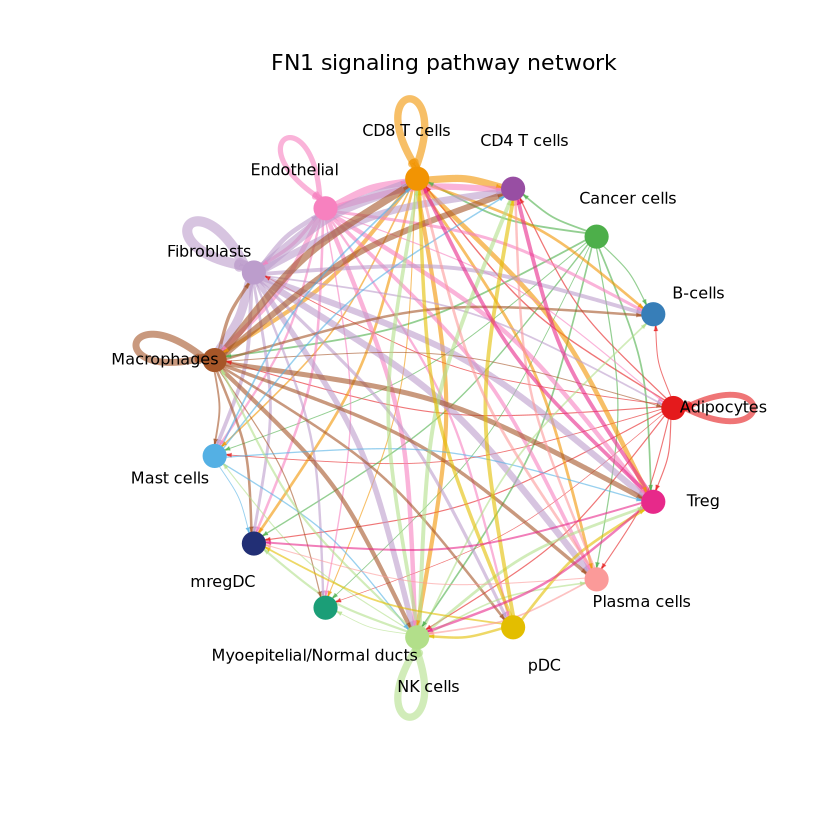

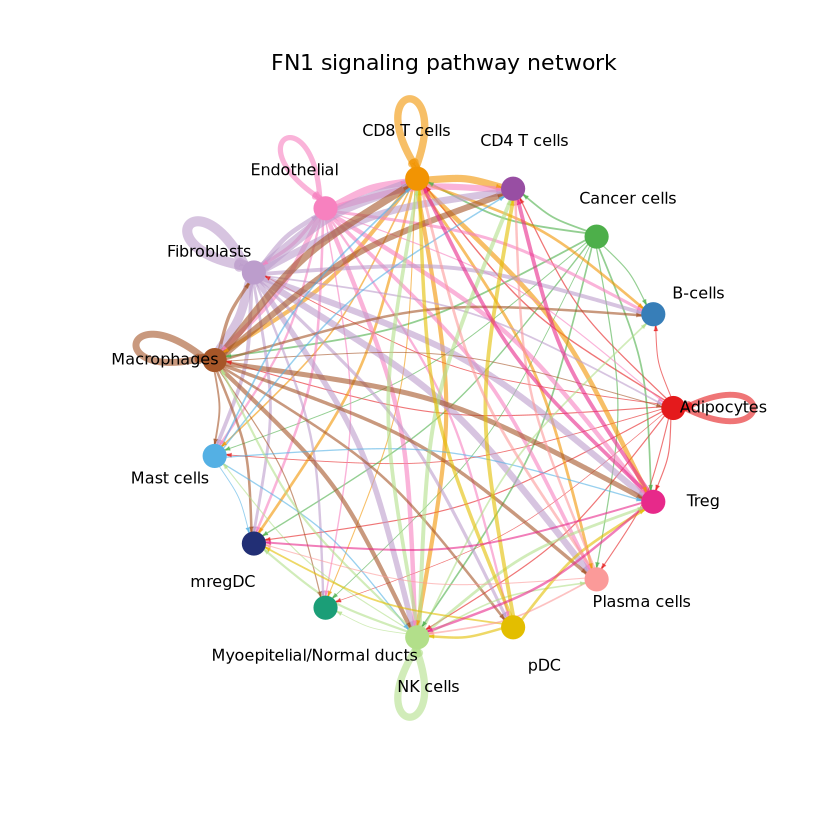

In [52]:
pathways.show <- c("FN1") 
# Circle plot
par(mfrow=c(1,1), xpd = TRUE) # `xpd = TRUE` should be added to show the title
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")

In [55]:
df.net <- subsetCommunication(cellchat)
head(df.net)

source       target       ligand receptor prob         pval interaction_name
1 Cancer cells Adipocytes   AREG   EGFR     1.318654e-08 0    AREG_EGFR       
2 Mast cells   Adipocytes   AREG   EGFR     7.336791e-10 0    AREG_EGFR       
3 NK cells     Adipocytes   AREG   EGFR     3.284735e-08 0    AREG_EGFR       
4 Cancer cells Cancer cells AREG   EGFR     3.679822e-06 0    AREG_EGFR       
5 Mast cells   Cancer cells AREG   EGFR     2.349293e-08 0    AREG_EGFR       
6 NK cells     Cancer cells AREG   EGFR     1.467239e-06 0    AREG_EGFR       
  interaction_name_2 pathway_name annotation         evidence      
1 AREG - EGFR        EGF          Secreted Signaling KEGG: hsa04012
2 AREG - EGFR        EGF          Secreted Signaling KEGG: hsa04012
3 AREG - EGFR        EGF          Secreted Signaling KEGG: hsa04012
4 AREG - EGFR        EGF          Secreted Signaling KEGG: hsa04012
5 AREG - EGFR        EGF          Secreted Signaling KEGG: hsa04012
6 AREG - EGFR        EGF          Secreted Signaling KEGG: hsa04012

In [56]:
df.net

source       target                    ligand receptor   prob         pval
1   Cancer cells Adipocytes                AREG   EGFR       1.318654e-08 0.00
2   Mast cells   Adipocytes                AREG   EGFR       7.336791e-10 0.00
3   NK cells     Adipocytes                AREG   EGFR       3.284735e-08 0.00
4   Cancer cells Cancer cells              AREG   EGFR       3.679822e-06 0.00
5   Mast cells   Cancer cells              AREG   EGFR       2.349293e-08 0.00
6   NK cells     Cancer cells              AREG   EGFR       1.467239e-06 0.00
7   Cancer cells Fibroblasts               AREG   EGFR       9.311369e-08 0.00
8   Mast cells   Fibroblasts               AREG   EGFR       4.792991e-09 0.00
9   NK cells     Fibroblasts               AREG   EGFR       2.087678e-07 0.00
10  Cancer cells Myoepitelial/Normal ducts AREG   EGFR       1.062712e-07 0.00
11  Mast cells   Myoepitelial/Normal ducts AREG   EGFR       8.341750e-09 0.00
12  NK cells     Myoepitelial/Normal ducts AREG   EGFR       2.232427e-07 0.00
13  Cancer cells Cancer cells              AREG   EGFR_ERBB2 2.992557e-06 0.00
14  Mast cells   Cancer cells              AREG   EGFR_ERBB2 1.910403e-08 0.00
15  NK cells     Cancer cells              AREG   EGFR_ERBB2 1.193309e-06 0.00
16  Cancer cells Myoepitelial/Normal ducts AREG   EGFR_ERBB2 1.715874e-07 0.00
17  Mast cells   Myoepitelial/Normal ducts AREG   EGFR_ERBB2 1.346953e-08 0.00
18  NK cells     Myoepitelial/Normal ducts AREG   EGFR_ERBB2 3.604238e-07 0.00
19  B-cells      Adipocytes                CCL19  CCR7       1.399942e-07 0.00
20  CD4 T cells  Adipocytes                CCL19  CCR7       1.656942e-07 0.00
21  CD8 T cells  Adipocytes                CCL19  CCR7       3.466612e-08 0.00
22  Endothelial  Adipocytes                CCL19  CCR7       1.683820e-07 0.00
23  mregDC       Adipocytes                CCL19  CCR7       5.114251e-07 0.00
24  NK cells     Adipocytes                CCL19  CCR7       4.467334e-09 0.03
25  B-cells      B-cells                   CCL19  CCR7       2.732550e-05 0.00
26  CD4 T cells  B-cells                   CCL19  CCR7       1.893069e-05 0.00
27  CD8 T cells  B-cells                   CCL19  CCR7       2.291505e-06 0.00
28  Endothelial  B-cells                   CCL19  CCR7       7.468265e-06 0.00
29  mregDC       B-cells                   CCL19  CCR7       2.512680e-05 0.00
30  NK cells     B-cells                   CCL19  CCR7       2.456340e-07 0.00
⋮   ⋮            ⋮                         ⋮      ⋮          ⋮            ⋮   
593 Endothelial  Treg                      PECAM1 PECAM1     3.183892e-05 0.00
594 Plasma cells Treg                      PECAM1 PECAM1     2.758772e-05 0.00
595 B-cells      Adipocytes                SELL   CD34       1.496457e-06 0.00
596 CD4 T cells  Adipocytes                SELL   CD34       1.462973e-06 0.00
597 CD8 T cells  Adipocytes                SELL   CD34       7.658945e-07 0.00
598 NK cells     Adipocytes                SELL   CD34       1.417425e-06 0.00
599 pDC          Adipocytes                SELL   CD34       1.174251e-06 0.00
600 Treg         Adipocytes                SELL   CD34       7.066997e-07 0.00
601 Adipocytes   Endothelial               SELL   CD34       5.395486e-06 0.00
602 B-cells      Endothelial               SELL   CD34       1.462392e-04 0.00
603 CD4 T cells  Endothelial               SELL   CD34       2.295035e-04 0.00
604 CD8 T cells  Endothelial               SELL   CD34       1.251012e-04 0.00
605 Macrophages  Endothelial               SELL   CD34       8.122247e-06 0.00
606 Mast cells   Endothelial               SELL   CD34       4.978825e-06 0.00
607 mregDC       Endothelial               SELL   CD34       1.126962e-05 0.00
608 NK cells     Endothelial               SELL   CD34       1.655924e-04 0.00
609 pDC          Endothelial               SELL   CD34       1.652140e-04 0.00
610 Plasma cells Endothelial               SELL   CD34       8.030202e-06 0.00
611 Treg         Endothelial               SELL   CD34

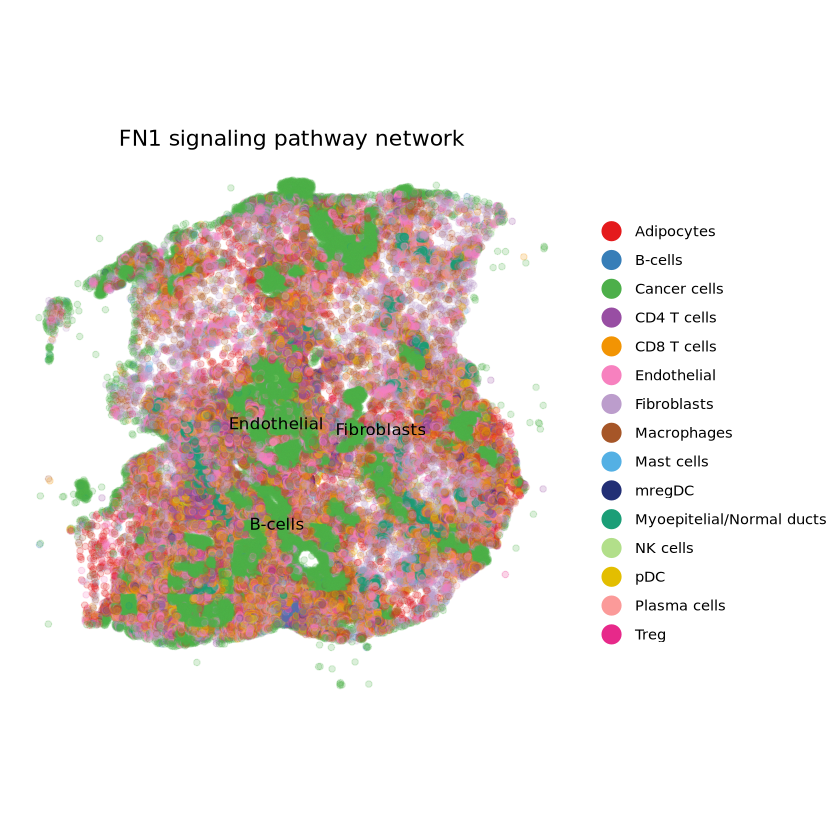

In [57]:
par(mfrow=c(1,1))
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "spatial", edge.width.max = 2, vertex.size.max = 1, alpha.image = 0.2, vertex.label.cex = 3.5)



In [59]:
# Compute the network centrality scores
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") # the slot 'netP' means the inferred intercellular communication network of signaling pathways

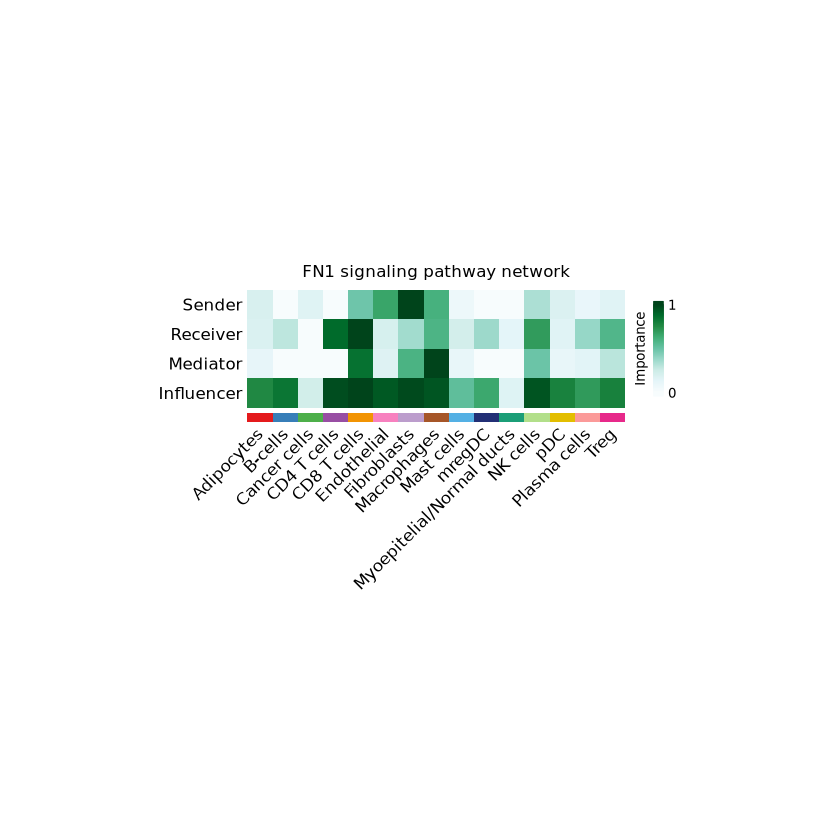

In [61]:
# Visualize the computed centrality scores using heatmap, allowing ready identification of major signaling roles of cell groups
# par(mfrow=c(1,1))
netAnalysis_signalingRole_network(cellchat, signaling = pathways.show, width = 8, height = 2.5, font.size = 10)

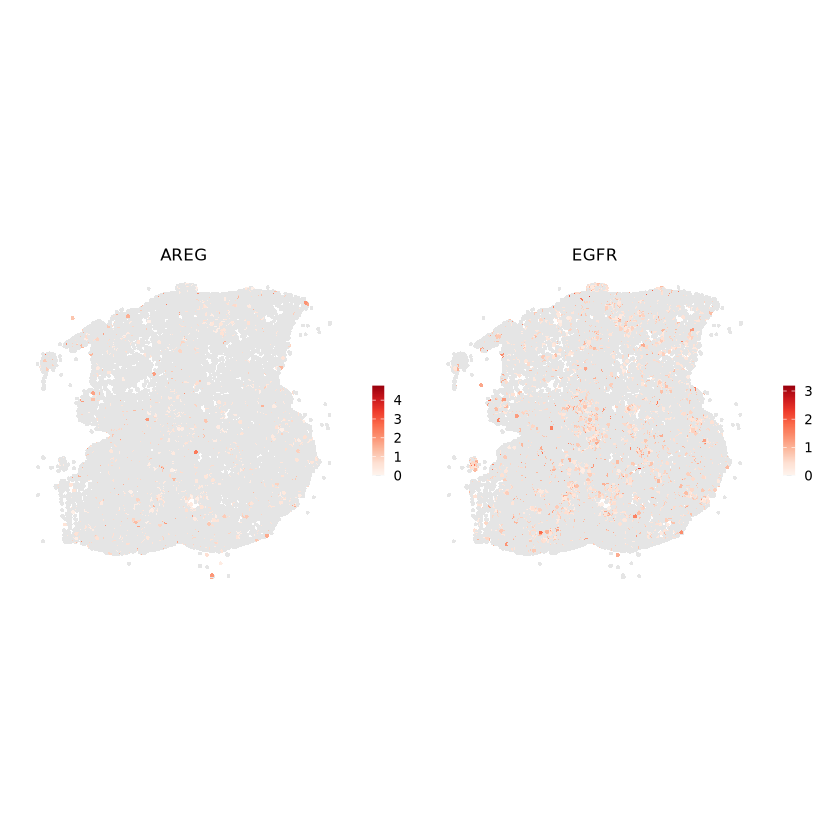

In [62]:
spatialFeaturePlot(cellchat, features = c("AREG","EGFR"), point.size = 0.8, color.heatmap = "Reds", direction = 1)

Applying a cutoff of  0.05 to the values... 


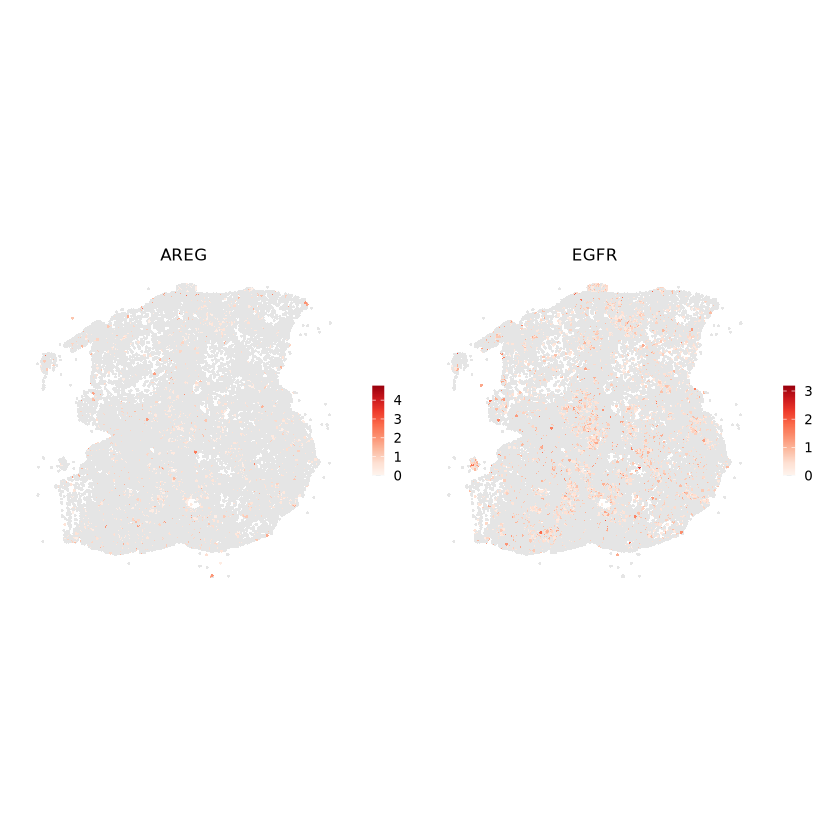

In [64]:
spatialFeaturePlot(cellchat, pairLR.use = "AREG_EGFR", point.size = 0.5, do.binary = FALSE, cutoff = 0.05, enriched.only = F, color.heatmap = "Reds", direction = 1)

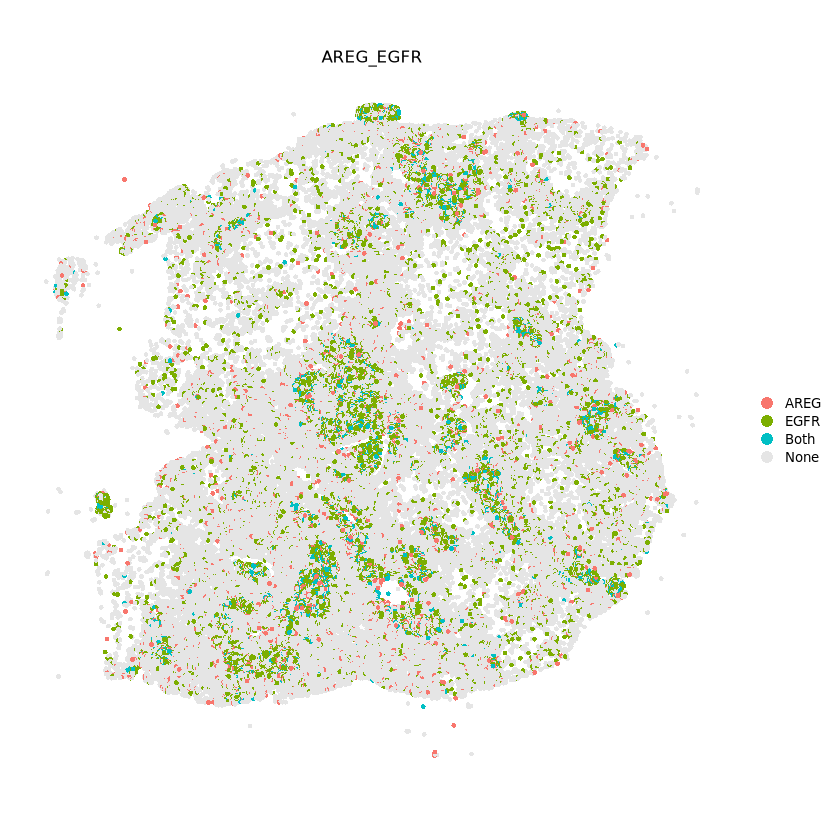

In [65]:
spatialFeaturePlot(cellchat, pairLR.use = "AREG_EGFR", point.size = 1, do.binary = TRUE, cutoff = 0.05, enriched.only = F, color.heatmap = "Reds", direction = 1)

In [66]:
saveRDS(cellchat, file = "/data/estorrs/mushroom/data/projects/submission_v1/analysis/cellchat/HT206B1/all.rds")

In [67]:
obj = readRDS("/data/estorrs/mushroom/data/projects/submission_v1/analysis/cellchat/HT206B1/all.rds")
obj

An object of class CellChat created from a single dataset 
 477 genes.
 111732 cells. 
CellChat analysis of spatial data! The input spatial locations are 
           x_cent y_cent
aaaagokl-1   1441    871
aaaaippd-1   1468    860
aaaajeja-1   1411    855
aaablpen-1   1449    858
aaaclnhj-1   1441    844
aaadfacg-1   1458    841

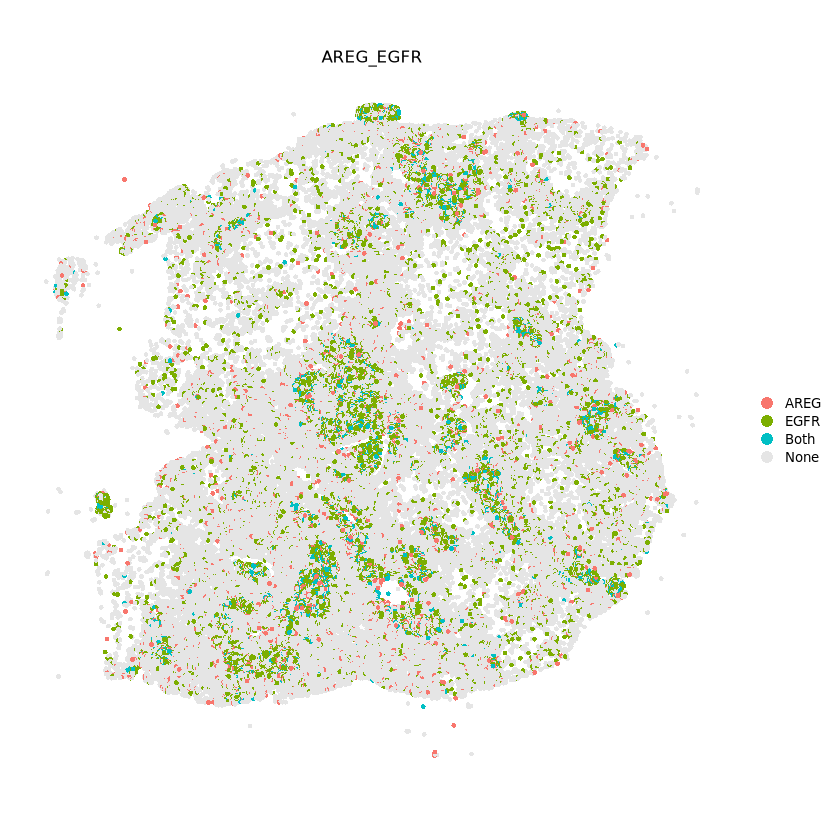

In [68]:
spatialFeaturePlot(obj, pairLR.use = "AREG_EGFR", point.size = 1, do.binary = TRUE, cutoff = 0.05, enriched.only = F, color.heatmap = "Reds", direction = 1)